In [34]:
import tensorflow as tf
import manager.dataset_manager as dm
import trade_dao as dao
import os
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


In [35]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [36]:
url = "http://localhost:5000/dataset"
response = requests.get(url)
jresponse = (
    "{}".content.decode("utf-8")
    if response in (None, "")
    else json.loads(response.content.decode("utf-8"))
)


In [37]:
pixels = np.array(jresponse["pixels"])
labels = np.array(jresponse["labels"])
dates = jresponse["dates"]


In [38]:
pixels = pixels.clip(min=0)



In [39]:
train_pixels, test_pixels = pixels[:30000], pixels[30000:]
train_labels, test_labels = labels[:30000], labels[30000:]

In [40]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(dm.PIXEL_HEIGHT, dm.PIXEL_WIDTH)),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(2),
    ]
)

predictions = model(train_pixels[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(train_labels[:1], predictions).numpy()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



0.19231114

In [41]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [42]:
model.fit(train_pixels, train_labels, epochs=20)

Train on 30000 samples
Epoch 1/20


   32/30000 [..............................] - ETA: 5:34 - loss: 2.5026 - accuracy: 0.5625

  448/30000 [..............................] - ETA: 26s - loss: 5.9308 - accuracy: 0.5424 

  864/30000 [..............................] - ETA: 15s - loss: 5.5405 - accuracy: 0.5521

 1312/30000 [>.............................] - ETA: 11s - loss: 4.7343 - accuracy: 0.5465

 1728/30000 [>.............................] - ETA: 9s - loss: 4.4428 - accuracy: 0.5457 

 2240/30000 [=>............................] - ETA: 7s - loss: 4.0326 - accuracy: 0.5455

 2688/30000 [=>............................] - ETA: 6s - loss: 3.7323 - accuracy: 0.5495

 3104/30000 [==>...........................] - ETA: 6s - loss: 3.5261 - accuracy: 0.5570

 3520/30000 [==>...........................] - ETA: 5s - loss: 3.3733 - accuracy: 0.5571

 4000/30000 [===>..........................] - ETA: 5s - loss: 3.4188 - accuracy: 0.5570

 4480/30000 [===>..........................] - ETA: 4s - loss: 3.3268 - accuracy: 0.5623

 4960/30000 [===>..........................] - ETA: 4s - loss: 3.2133 - accuracy: 0.5653

 5376/30000 [====>.........................] - ETA: 4s - loss: 3.2068 - accuracy: 0.5677

 5856/30000 [====>.........................] - ETA: 4s - loss: 3.1458 - accuracy: 0.5661

 6368/30000 [=====>........................] - ETA: 4s - loss: 3.1280 - accuracy: 0.5693

 6880/30000 [=====>........................] - ETA: 3s - loss: 3.0369 - accuracy: 0.5699

 7360/30000 [======>.......................] - ETA: 3s - loss: 2.9592 - accuracy: 0.5701

 7840/30000 [======>.......................] - ETA: 3s - loss: 3.0192 - accuracy: 0.5733

 8320/30000 [=======>......................] - ETA: 3s - loss: 2.9797 - accuracy: 0.5718

 8832/30000 [=======>......................] - ETA: 3s - loss: 2.9061 - accuracy: 0.5713

 9312/30000 [========>.....................] - ETA: 3s - loss: 2.8415 - accuracy: 0.5716

 9824/30000 [========>.....................] - ETA: 2s - loss: 2.8711 - accuracy: 0.5724

10304/30000 [=========>....................] - ETA: 2s - loss: 2.8767 - accuracy: 0.5747

10784/30000 [=========>....................] - ETA: 2s - loss: 2.8819 - accuracy: 0.5762

11232/30000 [==========>...................] - ETA: 2s - loss: 2.8050 - accuracy: 0.5782

11712/30000 [==========>...................] - ETA: 2s - loss: 2.7487 - accuracy: 0.5789

12128/30000 [===========>..................] - ETA: 2s - loss: 2.7052 - accuracy: 0.5789

12480/30000 [===========>..................] - ETA: 2s - loss: 2.6814 - accuracy: 0.5791

12928/30000 [===========>..................] - ETA: 2s - loss: 2.6522 - accuracy: 0.5791

13408/30000 [============>.................] - ETA: 2s - loss: 2.6086 - accuracy: 0.5800

13856/30000 [============>.................] - ETA: 2s - loss: 2.5580 - accuracy: 0.5816

14272/30000 [=============>................] - ETA: 2s - loss: 2.5715 - accuracy: 0.5818

14688/30000 [=============>................] - ETA: 2s - loss: 2.5283 - accuracy: 0.5824

15136/30000 [==============>...............] - ETA: 2s - loss: 2.4843 - accuracy: 0.5836

15616/30000 [==============>...............] - ETA: 1s - loss: 2.4487 - accuracy: 0.5843

16032/30000 [===============>..............] - ETA: 1s - loss: 2.4173 - accuracy: 0.5843

16512/30000 [===============>..............] - ETA: 1s - loss: 2.3758 - accuracy: 0.5850

16992/30000 [===============>..............] - ETA: 1s - loss: 2.3479 - accuracy: 0.5860

17472/30000 [================>.............] - ETA: 1s - loss: 2.3119 - accuracy: 0.5868

17920/30000 [================>.............] - ETA: 1s - loss: 2.2769 - accuracy: 0.5878

18368/30000 [=================>............] - ETA: 1s - loss: 2.2994 - accuracy: 0.5891

18880/30000 [=================>............] - ETA: 1s - loss: 2.2787 - accuracy: 0.5905

19328/30000 [==================>...........] - ETA: 1s - loss: 2.2810 - accuracy: 0.5913

19872/30000 [==================>...........] - ETA: 1s - loss: 2.2536 - accuracy: 0.5909

20320/30000 [===================>..........] - ETA: 1s - loss: 2.2476 - accuracy: 0.5908

20768/30000 [===================>..........] - ETA: 1s - loss: 2.2199 - accuracy: 0.5922

21216/30000 [====================>.........] - ETA: 1s - loss: 2.1920 - accuracy: 0.5917

21664/30000 [====================>.........] - ETA: 1s - loss: 2.1835 - accuracy: 0.5925

22144/30000 [=====================>........] - ETA: 1s - loss: 2.1625 - accuracy: 0.5931

22624/30000 [=====================>........] - ETA: 0s - loss: 2.1391 - accuracy: 0.5934

22976/30000 [=====================>........] - ETA: 0s - loss: 2.1186 - accuracy: 0.5941

23456/30000 [======================>.......] - ETA: 0s - loss: 2.0923 - accuracy: 0.5946

23936/30000 [======================>.......] - ETA: 0s - loss: 2.0728 - accuracy: 0.5960

24416/30000 [=======================>......] - ETA: 0s - loss: 2.0515 - accuracy: 0.5966

24896/30000 [=======================>......] - ETA: 0s - loss: 2.0344 - accuracy: 0.5974

25376/30000 [========================>.....] - ETA: 0s - loss: 2.0118 - accuracy: 0.5977

25888/30000 [========================>.....] - ETA: 0s - loss: 2.0214 - accuracy: 0.5983

26368/30000 [=========================>....] - ETA: 0s - loss: 2.0136 - accuracy: 0.5983

26848/30000 [=========================>....] - ETA: 0s - loss: 1.9962 - accuracy: 0.5981

27296/30000 [==========================>...] - ETA: 0s - loss: 2.0116 - accuracy: 0.5987

27776/30000 [==========================>...] - ETA: 0s - loss: 2.0149 - accuracy: 0.5997

28224/30000 [===========================>..] - ETA: 0s - loss: 2.0024 - accuracy: 0.6002

28672/30000 [===========================>..] - ETA: 0s - loss: 1.9921 - accuracy: 0.6002

29152/30000 [============================>.] - ETA: 0s - loss: 1.9771 - accuracy: 0.6007

29632/30000 [============================>.] - ETA: 0s - loss: 1.9768 - accuracy: 0.6009

30000/30000 [==============================] - 4s 124us/sample - loss: 1.9648 - accuracy: 0.6013


Epoch 2/20


   32/30000 [..............................] - ETA: 4s - loss: 1.1657 - accuracy: 0.6250

  512/30000 [..............................] - ETA: 3s - loss: 1.2931 - accuracy: 0.6289

  992/30000 [..............................] - ETA: 3s - loss: 1.4275 - accuracy: 0.6361

 1408/30000 [>.............................] - ETA: 3s - loss: 1.3518 - accuracy: 0.6250

 1856/30000 [>.............................] - ETA: 3s - loss: 1.2930 - accuracy: 0.6309

 2304/30000 [=>............................] - ETA: 3s - loss: 1.2724 - accuracy: 0.6298

 2752/30000 [=>............................] - ETA: 3s - loss: 1.1775 - accuracy: 0.6344

 3200/30000 [==>...........................] - ETA: 3s - loss: 1.2003 - accuracy: 0.6400

 3648/30000 [==>...........................] - ETA: 3s - loss: 1.1876 - accuracy: 0.6439

 4128/30000 [===>..........................] - ETA: 2s - loss: 1.2108 - accuracy: 0.6473

 4544/30000 [===>..........................] - ETA: 2s - loss: 1.2587 - accuracy: 0.6492

 5056/30000 [====>.........................] - ETA: 2s - loss: 1.2011 - accuracy: 0.6479

 5536/30000 [====>.........................] - ETA: 2s - loss: 1.1624 - accuracy: 0.6472

 6016/30000 [=====>........................] - ETA: 2s - loss: 1.1509 - accuracy: 0.6486

 6496/30000 [=====>........................] - ETA: 2s - loss: 1.1441 - accuracy: 0.6476

 6976/30000 [=====>........................] - ETA: 2s - loss: 1.1311 - accuracy: 0.6471

 7424/30000 [======>.......................] - ETA: 2s - loss: 1.1051 - accuracy: 0.6478

 7904/30000 [======>.......................] - ETA: 2s - loss: 1.0947 - accuracy: 0.6489

 8384/30000 [=======>......................] - ETA: 2s - loss: 1.0842 - accuracy: 0.6512

 8768/30000 [=======>......................] - ETA: 2s - loss: 1.0765 - accuracy: 0.6549

 9184/30000 [========>.....................] - ETA: 2s - loss: 1.0601 - accuracy: 0.6555

 9664/30000 [========>.....................] - ETA: 2s - loss: 1.0947 - accuracy: 0.6570

10112/30000 [=========>....................] - ETA: 2s - loss: 1.0799 - accuracy: 0.6572

10592/30000 [=========>....................] - ETA: 2s - loss: 1.0601 - accuracy: 0.6589

11008/30000 [==========>...................] - ETA: 2s - loss: 1.0484 - accuracy: 0.6592

11456/30000 [==========>...................] - ETA: 2s - loss: 1.0559 - accuracy: 0.6595

11904/30000 [==========>...................] - ETA: 2s - loss: 1.0428 - accuracy: 0.6595

12352/30000 [===========>..................] - ETA: 2s - loss: 1.0372 - accuracy: 0.6588

12832/30000 [===========>..................] - ETA: 1s - loss: 1.0229 - accuracy: 0.6580

13312/30000 [============>.................] - ETA: 1s - loss: 1.0117 - accuracy: 0.6581

13792/30000 [============>.................] - ETA: 1s - loss: 1.0391 - accuracy: 0.6578

14240/30000 [=============>................] - ETA: 1s - loss: 1.0252 - accuracy: 0.6596

14656/30000 [=============>................] - ETA: 1s - loss: 1.0250 - accuracy: 0.6595

15136/30000 [==============>...............] - ETA: 1s - loss: 1.0196 - accuracy: 0.6592

15552/30000 [==============>...............] - ETA: 1s - loss: 1.0104 - accuracy: 0.6591

16000/30000 [===============>..............] - ETA: 1s - loss: 1.0080 - accuracy: 0.6593

16512/30000 [===============>..............] - ETA: 1s - loss: 0.9972 - accuracy: 0.6598

17024/30000 [================>.............] - ETA: 1s - loss: 1.0083 - accuracy: 0.6606

17408/30000 [================>.............] - ETA: 1s - loss: 1.0002 - accuracy: 0.6609

17856/30000 [================>.............] - ETA: 1s - loss: 0.9918 - accuracy: 0.6605

18336/30000 [=================>............] - ETA: 1s - loss: 0.9958 - accuracy: 0.6609

18848/30000 [=================>............] - ETA: 1s - loss: 0.9945 - accuracy: 0.6605

19264/30000 [==================>...........] - ETA: 1s - loss: 0.9934 - accuracy: 0.6594

19744/30000 [==================>...........] - ETA: 1s - loss: 0.9921 - accuracy: 0.6599

20192/30000 [===================>..........] - ETA: 1s - loss: 0.9875 - accuracy: 0.6590

20672/30000 [===================>..........] - ETA: 1s - loss: 0.9812 - accuracy: 0.6587

21152/30000 [====================>.........] - ETA: 0s - loss: 0.9741 - accuracy: 0.6580

21568/30000 [====================>.........] - ETA: 0s - loss: 0.9833 - accuracy: 0.6582

22016/30000 [=====================>........] - ETA: 0s - loss: 0.9944 - accuracy: 0.6583

22464/30000 [=====================>........] - ETA: 0s - loss: 0.9923 - accuracy: 0.6576

22944/30000 [=====================>........] - ETA: 0s - loss: 0.9923 - accuracy: 0.6579

23424/30000 [======================>.......] - ETA: 0s - loss: 1.0132 - accuracy: 0.6571

23936/30000 [======================>.......] - ETA: 0s - loss: 1.0116 - accuracy: 0.6563

24416/30000 [=======================>......] - ETA: 0s - loss: 1.0081 - accuracy: 0.6558

24608/30000 [=======================>......] - ETA: 0s - loss: 1.0067 - accuracy: 0.6556

24768/30000 [=======================>......] - ETA: 0s - loss: 1.0043 - accuracy: 0.6556

25216/30000 [========================>.....] - ETA: 0s - loss: 1.0072 - accuracy: 0.6555

25632/30000 [========================>.....] - ETA: 0s - loss: 1.0135 - accuracy: 0.6559

26080/30000 [=========================>....] - ETA: 0s - loss: 1.0074 - accuracy: 0.6559

26496/30000 [=========================>....] - ETA: 0s - loss: 1.0041 - accuracy: 0.6559

26624/30000 [=========================>....] - ETA: 0s - loss: 1.0023 - accuracy: 0.6560

26880/30000 [=========================>....] - ETA: 0s - loss: 0.9987 - accuracy: 0.6555

26912/30000 [=========================>....] - ETA: 0s - loss: 0.9982 - accuracy: 0.6555

27168/30000 [==========================>...] - ETA: 0s - loss: 0.9960 - accuracy: 0.6560

27648/30000 [==========================>...] - ETA: 0s - loss: 0.9905 - accuracy: 0.6565

28096/30000 [===========================>..] - ETA: 0s - loss: 0.9872 - accuracy: 0.6561

28512/30000 [===========================>..] - ETA: 0s - loss: 0.9870 - accuracy: 0.6559

28960/30000 [===========================>..] - ETA: 0s - loss: 0.9834 - accuracy: 0.6555

29376/30000 [============================>.] - ETA: 0s - loss: 0.9814 - accuracy: 0.6560

29856/30000 [============================>.] - ETA: 0s - loss: 0.9782 - accuracy: 0.6557

30000/30000 [==============================] - 4s 146us/sample - loss: 0.9809 - accuracy: 0.6555


Epoch 3/20
   32/30000 [..............................] - ETA: 4s - loss: 0.6563 - accuracy: 0.5625

  512/30000 [..............................] - ETA: 3s - loss: 0.7097 - accuracy: 0.6602

  960/30000 [..............................] - ETA: 3s - loss: 1.0380 - accuracy: 0.6833

 1408/30000 [>.............................] - ETA: 3s - loss: 0.9930 - accuracy: 0.6712

 1856/30000 [>.............................] - ETA: 3s - loss: 0.9050 - accuracy: 0.6670

 2304/30000 [=>............................] - ETA: 3s - loss: 0.9516 - accuracy: 0.6658

 2784/30000 [=>............................] - ETA: 3s - loss: 0.9127 - accuracy: 0.6663

 3232/30000 [==>...........................] - ETA: 3s - loss: 0.8699 - accuracy: 0.6652

 3680/30000 [==>...........................] - ETA: 3s - loss: 0.8678 - accuracy: 0.6693

 4160/30000 [===>..........................] - ETA: 2s - loss: 0.8467 - accuracy: 0.6675

 4544/30000 [===>..........................] - ETA: 2s - loss: 0.8403 - accuracy: 0.6690

 5024/30000 [====>.........................] - ETA: 2s - loss: 0.8268 - accuracy: 0.6700

 5472/30000 [====>.........................] - ETA: 2s - loss: 0.8192 - accuracy: 0.6743

 5952/30000 [====>.........................] - ETA: 2s - loss: 0.8054 - accuracy: 0.6741

 6432/30000 [=====>........................] - ETA: 2s - loss: 0.8076 - accuracy: 0.6749

 6912/30000 [=====>........................] - ETA: 2s - loss: 0.7995 - accuracy: 0.6762

 7360/30000 [======>.......................] - ETA: 2s - loss: 0.8238 - accuracy: 0.6750

 7840/30000 [======>.......................] - ETA: 2s - loss: 0.8224 - accuracy: 0.6746

 8320/30000 [=======>......................] - ETA: 2s - loss: 0.8112 - accuracy: 0.6745

 8832/30000 [=======>......................] - ETA: 2s - loss: 0.8075 - accuracy: 0.6736

 9248/30000 [========>.....................] - ETA: 2s - loss: 0.8062 - accuracy: 0.6719

 9632/30000 [========>.....................] - ETA: 2s - loss: 0.8095 - accuracy: 0.6710

10112/30000 [=========>....................] - ETA: 2s - loss: 0.8061 - accuracy: 0.6706

10592/30000 [=========>....................] - ETA: 2s - loss: 0.8002 - accuracy: 0.6708

11104/30000 [==========>...................] - ETA: 2s - loss: 0.7931 - accuracy: 0.6725

11616/30000 [==========>...................] - ETA: 2s - loss: 0.7856 - accuracy: 0.6736

12064/30000 [===========>..................] - ETA: 2s - loss: 0.7848 - accuracy: 0.6748

12544/30000 [===========>..................] - ETA: 1s - loss: 0.7804 - accuracy: 0.6745

12992/30000 [===========>..................] - ETA: 1s - loss: 0.7856 - accuracy: 0.6750

13440/30000 [============>.................] - ETA: 1s - loss: 0.7832 - accuracy: 0.6751

13920/30000 [============>.................] - ETA: 1s - loss: 0.7800 - accuracy: 0.6746

14400/30000 [=============>................] - ETA: 1s - loss: 0.7751 - accuracy: 0.6744

14880/30000 [=============>................] - ETA: 1s - loss: 0.7827 - accuracy: 0.6742

15360/30000 [==============>...............] - ETA: 1s - loss: 0.7808 - accuracy: 0.6723

15456/30000 [==============>...............] - ETA: 2s - loss: 0.7808 - accuracy: 0.6722

15648/30000 [==============>...............] - ETA: 2s - loss: 0.7840 - accuracy: 0.6716

16032/30000 [===============>..............] - ETA: 2s - loss: 0.7882 - accuracy: 0.6715

16480/30000 [===============>..............] - ETA: 1s - loss: 0.7871 - accuracy: 0.6706

16960/30000 [===============>..............] - ETA: 1s - loss: 0.8091 - accuracy: 0.6703

17440/30000 [================>.............] - ETA: 1s - loss: 0.8044 - accuracy: 0.6699

17920/30000 [================>.............] - ETA: 1s - loss: 0.8033 - accuracy: 0.6691

18400/30000 [=================>............] - ETA: 1s - loss: 0.7995 - accuracy: 0.6690

18848/30000 [=================>............] - ETA: 1s - loss: 0.7965 - accuracy: 0.6692

19328/30000 [==================>...........] - ETA: 1s - loss: 0.8176 - accuracy: 0.6695

19808/30000 [==================>...........] - ETA: 1s - loss: 0.8155 - accuracy: 0.6685

20288/30000 [===================>..........] - ETA: 1s - loss: 0.8269 - accuracy: 0.6684

20736/30000 [===================>..........] - ETA: 1s - loss: 0.8235 - accuracy: 0.6688

21248/30000 [====================>.........] - ETA: 1s - loss: 0.8188 - accuracy: 0.6691

21728/30000 [====================>.........] - ETA: 1s - loss: 0.8171 - accuracy: 0.6685

22208/30000 [=====================>........] - ETA: 1s - loss: 0.8150 - accuracy: 0.6686

22688/30000 [=====================>........] - ETA: 0s - loss: 0.8134 - accuracy: 0.6675

23136/30000 [======================>.......] - ETA: 0s - loss: 0.8113 - accuracy: 0.6680

23552/30000 [======================>.......] - ETA: 0s - loss: 0.8107 - accuracy: 0.6675

23968/30000 [======================>.......] - ETA: 0s - loss: 0.8077 - accuracy: 0.6676

24480/30000 [=======================>......] - ETA: 0s - loss: 0.8090 - accuracy: 0.6679

24992/30000 [=======================>......] - ETA: 0s - loss: 0.8045 - accuracy: 0.6685

25472/30000 [========================>.....] - ETA: 0s - loss: 0.8068 - accuracy: 0.6686

25952/30000 [========================>.....] - ETA: 0s - loss: 0.8067 - accuracy: 0.6682

26432/30000 [=========================>....] - ETA: 0s - loss: 0.8066 - accuracy: 0.6685

26912/30000 [=========================>....] - ETA: 0s - loss: 0.8052 - accuracy: 0.6687

27360/30000 [==========================>...] - ETA: 0s - loss: 0.8127 - accuracy: 0.6690

27840/30000 [==========================>...] - ETA: 0s - loss: 0.8097 - accuracy: 0.6688

28352/30000 [===========================>..] - ETA: 0s - loss: 0.8069 - accuracy: 0.6688

28832/30000 [===========================>..] - ETA: 0s - loss: 0.8089 - accuracy: 0.6689

28864/30000 [===========================>..] - ETA: 0s - loss: 0.8087 - accuracy: 0.6689

29056/30000 [============================>.] - ETA: 0s - loss: 0.8124 - accuracy: 0.6688

29440/30000 [============================>.] - ETA: 0s - loss: 0.8143 - accuracy: 0.6686

29952/30000 [============================>.] - ETA: 0s - loss: 0.8163 - accuracy: 0.6682

30000/30000 [==============================] - 4s 146us/sample - loss: 0.8170 - accuracy: 0.6681


Epoch 4/20
   32/30000 [..............................] - ETA: 4s - loss: 0.5676 - accuracy: 0.5938

  544/30000 [..............................] - ETA: 3s - loss: 0.7592 - accuracy: 0.6801

  576/30000 [..............................] - ETA: 11s - loss: 0.7464 - accuracy: 0.6858

  800/30000 [..............................] - ETA: 10s - loss: 0.6990 - accuracy: 0.6837

 1248/30000 [>.............................] - ETA: 7s - loss: 0.7227 - accuracy: 0.6779 

 1728/30000 [>.............................] - ETA: 6s - loss: 0.7133 - accuracy: 0.6655

 2176/30000 [=>............................] - ETA: 5s - loss: 0.7433 - accuracy: 0.6719

 2656/30000 [=>............................] - ETA: 5s - loss: 0.7404 - accuracy: 0.6770

 3136/30000 [==>...........................] - ETA: 4s - loss: 0.7202 - accuracy: 0.6814

 3584/30000 [==>...........................] - ETA: 4s - loss: 0.8535 - accuracy: 0.6805

 4064/30000 [===>..........................] - ETA: 4s - loss: 0.8489 - accuracy: 0.6826

 4448/30000 [===>..........................] - ETA: 3s - loss: 0.8233 - accuracy: 0.6866

 4864/30000 [===>..........................] - ETA: 3s - loss: 0.8047 - accuracy: 0.6856

 5344/30000 [====>.........................] - ETA: 3s - loss: 0.7907 - accuracy: 0.6843

 5824/30000 [====>.........................] - ETA: 3s - loss: 0.7772 - accuracy: 0.6836

 6304/30000 [=====>........................] - ETA: 3s - loss: 0.7693 - accuracy: 0.6829

 6784/30000 [=====>........................] - ETA: 3s - loss: 0.7607 - accuracy: 0.6837

 7296/30000 [======>.......................] - ETA: 3s - loss: 0.7509 - accuracy: 0.6827

 7808/30000 [======>.......................] - ETA: 2s - loss: 0.7436 - accuracy: 0.6856

 8256/30000 [=======>......................] - ETA: 2s - loss: 0.7396 - accuracy: 0.6848

 8768/30000 [=======>......................] - ETA: 2s - loss: 0.7335 - accuracy: 0.6833

 9216/30000 [========>.....................] - ETA: 2s - loss: 0.7303 - accuracy: 0.6828

 9600/30000 [========>.....................] - ETA: 2s - loss: 0.7278 - accuracy: 0.6826

10080/30000 [=========>....................] - ETA: 2s - loss: 0.7242 - accuracy: 0.6813

10592/30000 [=========>....................] - ETA: 2s - loss: 0.7201 - accuracy: 0.6812

11040/30000 [==========>...................] - ETA: 2s - loss: 0.7196 - accuracy: 0.6815

11520/30000 [==========>...................] - ETA: 2s - loss: 0.7166 - accuracy: 0.6819

11968/30000 [==========>...................] - ETA: 2s - loss: 0.7149 - accuracy: 0.6828

12480/30000 [===========>..................] - ETA: 2s - loss: 0.7111 - accuracy: 0.6839

12992/30000 [===========>..................] - ETA: 2s - loss: 0.7069 - accuracy: 0.6833

13472/30000 [============>.................] - ETA: 2s - loss: 0.7047 - accuracy: 0.6824

13952/30000 [============>.................] - ETA: 1s - loss: 0.7193 - accuracy: 0.6833

14368/30000 [=============>................] - ETA: 1s - loss: 0.7187 - accuracy: 0.6829

14784/30000 [=============>................] - ETA: 1s - loss: 0.7222 - accuracy: 0.6827

15232/30000 [==============>...............] - ETA: 1s - loss: 0.7178 - accuracy: 0.6837

15584/30000 [==============>...............] - ETA: 1s - loss: 0.7169 - accuracy: 0.6838

16064/30000 [===============>..............] - ETA: 1s - loss: 0.7182 - accuracy: 0.6841

16544/30000 [===============>..............] - ETA: 1s - loss: 0.7195 - accuracy: 0.6844

16960/30000 [===============>..............] - ETA: 1s - loss: 0.7199 - accuracy: 0.6841

17408/30000 [================>.............] - ETA: 1s - loss: 0.7177 - accuracy: 0.6834

17760/30000 [================>.............] - ETA: 1s - loss: 0.7152 - accuracy: 0.6839

18208/30000 [=================>............] - ETA: 1s - loss: 0.7147 - accuracy: 0.6834

18688/30000 [=================>............] - ETA: 1s - loss: 0.7155 - accuracy: 0.6840

19136/30000 [==================>...........] - ETA: 1s - loss: 0.7159 - accuracy: 0.6840

19584/30000 [==================>...........] - ETA: 1s - loss: 0.7142 - accuracy: 0.6837

20000/30000 [===================>..........] - ETA: 1s - loss: 0.7112 - accuracy: 0.6837

20480/30000 [===================>..........] - ETA: 1s - loss: 0.7245 - accuracy: 0.6830

20960/30000 [===================>..........] - ETA: 1s - loss: 0.7229 - accuracy: 0.6827

21408/30000 [====================>.........] - ETA: 1s - loss: 0.7230 - accuracy: 0.6822

21920/30000 [====================>.........] - ETA: 0s - loss: 0.7234 - accuracy: 0.6820

22432/30000 [=====================>........] - ETA: 0s - loss: 0.7372 - accuracy: 0.6827

22944/30000 [=====================>........] - ETA: 0s - loss: 0.7386 - accuracy: 0.6815

22976/30000 [=====================>........] - ETA: 0s - loss: 0.7387 - accuracy: 0.6815

23328/30000 [======================>.......] - ETA: 0s - loss: 0.7378 - accuracy: 0.6813

23808/30000 [======================>.......] - ETA: 0s - loss: 0.7448 - accuracy: 0.6808

24256/30000 [=======================>......] - ETA: 0s - loss: 0.7434 - accuracy: 0.6805

24704/30000 [=======================>......] - ETA: 0s - loss: 0.7427 - accuracy: 0.6802

25120/30000 [========================>.....] - ETA: 0s - loss: 0.7465 - accuracy: 0.6798

25600/30000 [========================>.....] - ETA: 0s - loss: 0.7486 - accuracy: 0.6796

26080/30000 [=========================>....] - ETA: 0s - loss: 0.7509 - accuracy: 0.6786

26528/30000 [=========================>....] - ETA: 0s - loss: 0.7491 - accuracy: 0.6781

27008/30000 [==========================>...] - ETA: 0s - loss: 0.7544 - accuracy: 0.6782

27424/30000 [==========================>...] - ETA: 0s - loss: 0.7754 - accuracy: 0.6774

27904/30000 [==========================>...] - ETA: 0s - loss: 0.7731 - accuracy: 0.6773

28416/30000 [===========================>..] - ETA: 0s - loss: 0.7738 - accuracy: 0.6771

28896/30000 [===========================>..] - ETA: 0s - loss: 0.7754 - accuracy: 0.6771

29408/30000 [============================>.] - ETA: 0s - loss: 0.7746 - accuracy: 0.6766

29920/30000 [============================>.] - ETA: 0s - loss: 0.7879 - accuracy: 0.6766

30000/30000 [==============================] - 4s 134us/sample - loss: 0.7908 - accuracy: 0.6765


Epoch 5/20
   32/30000 [..............................] - ETA: 3s - loss: 0.5332 - accuracy: 0.6875

  512/30000 [..............................] - ETA: 3s - loss: 0.6653 - accuracy: 0.6777

  992/30000 [..............................] - ETA: 3s - loss: 0.6864 - accuracy: 0.6784

 1440/30000 [>.............................] - ETA: 3s - loss: 0.6777 - accuracy: 0.6861

 1856/30000 [>.............................] - ETA: 3s - loss: 0.6663 - accuracy: 0.6967

 2336/30000 [=>............................] - ETA: 3s - loss: 0.6834 - accuracy: 0.6999

 2816/30000 [=>............................] - ETA: 3s - loss: 0.6964 - accuracy: 0.6999

 3296/30000 [==>...........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.6978

 3744/30000 [==>...........................] - ETA: 2s - loss: 0.7036 - accuracy: 0.6955

 4224/30000 [===>..........................] - ETA: 2s - loss: 0.7701 - accuracy: 0.6934

 4704/30000 [===>..........................] - ETA: 2s - loss: 0.7619 - accuracy: 0.6915

 5216/30000 [====>.........................] - ETA: 2s - loss: 0.7596 - accuracy: 0.6944

 5600/30000 [====>.........................] - ETA: 2s - loss: 0.7516 - accuracy: 0.6946

 6080/30000 [=====>........................] - ETA: 2s - loss: 0.7518 - accuracy: 0.6946

 6592/30000 [=====>........................] - ETA: 2s - loss: 0.7436 - accuracy: 0.6931

 7072/30000 [======>.......................] - ETA: 2s - loss: 0.7564 - accuracy: 0.6919

 7552/30000 [======>.......................] - ETA: 2s - loss: 0.7463 - accuracy: 0.6927

 8032/30000 [=======>......................] - ETA: 2s - loss: 0.7510 - accuracy: 0.6940

 8512/30000 [=======>......................] - ETA: 2s - loss: 0.7469 - accuracy: 0.6910

 8992/30000 [=======>......................] - ETA: 2s - loss: 0.7515 - accuracy: 0.6909

 9472/30000 [========>.....................] - ETA: 2s - loss: 0.7583 - accuracy: 0.6921

 9952/30000 [========>.....................] - ETA: 2s - loss: 0.7544 - accuracy: 0.6909

10464/30000 [=========>....................] - ETA: 2s - loss: 0.7518 - accuracy: 0.6892

10912/30000 [=========>....................] - ETA: 2s - loss: 0.7495 - accuracy: 0.6901

11392/30000 [==========>...................] - ETA: 2s - loss: 0.7461 - accuracy: 0.6898

11904/30000 [==========>...................] - ETA: 1s - loss: 0.7426 - accuracy: 0.6878

12320/30000 [===========>..................] - ETA: 1s - loss: 0.7461 - accuracy: 0.6866

12800/30000 [===========>..................] - ETA: 1s - loss: 0.7584 - accuracy: 0.6855

13280/30000 [============>.................] - ETA: 1s - loss: 0.7586 - accuracy: 0.6863

13760/30000 [============>.................] - ETA: 1s - loss: 0.7768 - accuracy: 0.6878

14144/30000 [=============>................] - ETA: 1s - loss: 0.8205 - accuracy: 0.6870

14624/30000 [=============>................] - ETA: 1s - loss: 0.8222 - accuracy: 0.6850

15104/30000 [==============>...............] - ETA: 1s - loss: 0.8136 - accuracy: 0.6866

15584/30000 [==============>...............] - ETA: 1s - loss: 0.8125 - accuracy: 0.6876

16064/30000 [===============>..............] - ETA: 1s - loss: 0.8298 - accuracy: 0.6880

16576/30000 [===============>..............] - ETA: 1s - loss: 0.8302 - accuracy: 0.6885

17088/30000 [================>.............] - ETA: 1s - loss: 0.8279 - accuracy: 0.6874

17600/30000 [================>.............] - ETA: 1s - loss: 0.8286 - accuracy: 0.6864

18048/30000 [=================>............] - ETA: 1s - loss: 0.8250 - accuracy: 0.6861

18496/30000 [=================>............] - ETA: 1s - loss: 0.8201 - accuracy: 0.6869

18944/30000 [=================>............] - ETA: 1s - loss: 0.8165 - accuracy: 0.6873

19392/30000 [==================>...........] - ETA: 1s - loss: 0.8112 - accuracy: 0.6869

19872/30000 [==================>...........] - ETA: 1s - loss: 0.8090 - accuracy: 0.6863

20320/30000 [===================>..........] - ETA: 1s - loss: 0.8070 - accuracy: 0.6853

20736/30000 [===================>..........] - ETA: 1s - loss: 0.8045 - accuracy: 0.6848

21280/30000 [====================>.........] - ETA: 0s - loss: 0.8020 - accuracy: 0.6852

21728/30000 [====================>.........] - ETA: 0s - loss: 0.8003 - accuracy: 0.6849

22240/30000 [=====================>........] - ETA: 0s - loss: 0.8013 - accuracy: 0.6853

22624/30000 [=====================>........] - ETA: 0s - loss: 0.8018 - accuracy: 0.6853

23104/30000 [======================>.......] - ETA: 0s - loss: 0.7987 - accuracy: 0.6847

23616/30000 [======================>.......] - ETA: 0s - loss: 0.7948 - accuracy: 0.6849

24128/30000 [=======================>......] - ETA: 0s - loss: 0.7899 - accuracy: 0.6851

24640/30000 [=======================>......] - ETA: 0s - loss: 0.7963 - accuracy: 0.6840

25184/30000 [========================>.....] - ETA: 0s - loss: 0.7952 - accuracy: 0.6839

25568/30000 [========================>.....] - ETA: 0s - loss: 0.8035 - accuracy: 0.6836

26016/30000 [=========================>....] - ETA: 0s - loss: 0.8027 - accuracy: 0.6835

26432/30000 [=========================>....] - ETA: 0s - loss: 0.8006 - accuracy: 0.6837

26912/30000 [=========================>....] - ETA: 0s - loss: 0.8365 - accuracy: 0.6837

27392/30000 [==========================>...] - ETA: 0s - loss: 0.8345 - accuracy: 0.6835

27904/30000 [==========================>...] - ETA: 0s - loss: 0.8552 - accuracy: 0.6833

28384/30000 [===========================>..] - ETA: 0s - loss: 0.8570 - accuracy: 0.6834

28864/30000 [===========================>..] - ETA: 0s - loss: 0.8553 - accuracy: 0.6835

29312/30000 [============================>.] - ETA: 0s - loss: 0.8616 - accuracy: 0.6840

29792/30000 [============================>.] - ETA: 0s - loss: 0.8641 - accuracy: 0.6836

30000/30000 [==============================] - 3s 110us/sample - loss: 0.8619 - accuracy: 0.6837


Epoch 6/20
   32/30000 [..............................] - ETA: 4s - loss: 0.6399 - accuracy: 0.5312

  512/30000 [..............................] - ETA: 3s - loss: 0.7603 - accuracy: 0.6934

  992/30000 [..............................] - ETA: 3s - loss: 0.6630 - accuracy: 0.7046

 1440/30000 [>.............................] - ETA: 3s - loss: 0.6417 - accuracy: 0.7000

 1856/30000 [>.............................] - ETA: 3s - loss: 0.6206 - accuracy: 0.7058

 2304/30000 [=>............................] - ETA: 3s - loss: 0.6134 - accuracy: 0.7075

 2752/30000 [=>............................] - ETA: 3s - loss: 0.7324 - accuracy: 0.7082

 3200/30000 [==>...........................] - ETA: 3s - loss: 0.7131 - accuracy: 0.7034

 3680/30000 [==>...........................] - ETA: 3s - loss: 0.7038 - accuracy: 0.6957

 4128/30000 [===>..........................] - ETA: 2s - loss: 0.6989 - accuracy: 0.6899

 4160/30000 [===>..........................] - ETA: 5s - loss: 0.6980 - accuracy: 0.6901

 4384/30000 [===>..........................] - ETA: 5s - loss: 0.7164 - accuracy: 0.6918

 4832/30000 [===>..........................] - ETA: 5s - loss: 0.7063 - accuracy: 0.6904

 5280/30000 [====>.........................] - ETA: 5s - loss: 0.7028 - accuracy: 0.6917

 5760/30000 [====>.........................] - ETA: 4s - loss: 0.6981 - accuracy: 0.6908

 6208/30000 [=====>........................] - ETA: 4s - loss: 0.6869 - accuracy: 0.6964

 6688/30000 [=====>........................] - ETA: 4s - loss: 0.7035 - accuracy: 0.6962

 7168/30000 [======>.......................] - ETA: 4s - loss: 0.6941 - accuracy: 0.6987

 7648/30000 [======>.......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.6991

 8128/30000 [=======>......................] - ETA: 3s - loss: 0.6946 - accuracy: 0.6972

 8608/30000 [=======>......................] - ETA: 3s - loss: 0.6926 - accuracy: 0.6983

 9056/30000 [========>.....................] - ETA: 3s - loss: 0.7002 - accuracy: 0.6984

 9536/30000 [========>.....................] - ETA: 3s - loss: 0.6963 - accuracy: 0.6963

 9984/30000 [========>.....................] - ETA: 3s - loss: 0.6946 - accuracy: 0.6951

10432/30000 [=========>....................] - ETA: 3s - loss: 0.6891 - accuracy: 0.6956

10944/30000 [=========>....................] - ETA: 2s - loss: 0.6873 - accuracy: 0.6953

11456/30000 [==========>...................] - ETA: 2s - loss: 0.6821 - accuracy: 0.6961

11904/30000 [==========>...................] - ETA: 2s - loss: 0.6778 - accuracy: 0.6964

12352/30000 [===========>..................] - ETA: 2s - loss: 0.6799 - accuracy: 0.6955

12768/30000 [===========>..................] - ETA: 2s - loss: 0.6991 - accuracy: 0.6959

13216/30000 [============>.................] - ETA: 2s - loss: 0.7087 - accuracy: 0.6963

13632/30000 [============>.................] - ETA: 2s - loss: 0.7108 - accuracy: 0.6967

14112/30000 [=============>................] - ETA: 2s - loss: 0.7356 - accuracy: 0.6968

14560/30000 [=============>................] - ETA: 2s - loss: 0.7343 - accuracy: 0.6964

14976/30000 [=============>................] - ETA: 2s - loss: 0.7318 - accuracy: 0.6961

15424/30000 [==============>...............] - ETA: 2s - loss: 0.7296 - accuracy: 0.6968

15872/30000 [==============>...............] - ETA: 2s - loss: 0.7277 - accuracy: 0.6957

16352/30000 [===============>..............] - ETA: 1s - loss: 0.7242 - accuracy: 0.6954

16832/30000 [===============>..............] - ETA: 1s - loss: 0.7223 - accuracy: 0.6959

17312/30000 [================>.............] - ETA: 1s - loss: 0.7207 - accuracy: 0.6958

17792/30000 [================>.............] - ETA: 1s - loss: 0.7222 - accuracy: 0.6950

18240/30000 [=================>............] - ETA: 1s - loss: 0.7229 - accuracy: 0.6944

18720/30000 [=================>............] - ETA: 1s - loss: 0.7192 - accuracy: 0.6941

19168/30000 [==================>...........] - ETA: 1s - loss: 0.7178 - accuracy: 0.6939

19616/30000 [==================>...........] - ETA: 1s - loss: 0.7149 - accuracy: 0.6937

20064/30000 [===================>..........] - ETA: 1s - loss: 0.7139 - accuracy: 0.6941

20352/30000 [===================>..........] - ETA: 1s - loss: 0.7143 - accuracy: 0.6941

20800/30000 [===================>..........] - ETA: 1s - loss: 0.7232 - accuracy: 0.6933

21280/30000 [====================>.........] - ETA: 1s - loss: 0.7446 - accuracy: 0.6928

21696/30000 [====================>.........] - ETA: 1s - loss: 0.7666 - accuracy: 0.6923

22144/30000 [=====================>........] - ETA: 1s - loss: 0.7669 - accuracy: 0.6912

22592/30000 [=====================>........] - ETA: 0s - loss: 0.7666 - accuracy: 0.6903

23040/30000 [======================>.......] - ETA: 0s - loss: 0.7637 - accuracy: 0.6903

23488/30000 [======================>.......] - ETA: 0s - loss: 0.7604 - accuracy: 0.6904

23968/30000 [======================>.......] - ETA: 0s - loss: 0.7570 - accuracy: 0.6903

24480/30000 [=======================>......] - ETA: 0s - loss: 0.7536 - accuracy: 0.6903

24992/30000 [=======================>......] - ETA: 0s - loss: 0.7662 - accuracy: 0.6907

25504/30000 [========================>.....] - ETA: 0s - loss: 0.7740 - accuracy: 0.6913

25952/30000 [========================>.....] - ETA: 0s - loss: 0.7726 - accuracy: 0.6915

26432/30000 [=========================>....] - ETA: 0s - loss: 0.7750 - accuracy: 0.6916

26880/30000 [=========================>....] - ETA: 0s - loss: 0.7716 - accuracy: 0.6923

27328/30000 [==========================>...] - ETA: 0s - loss: 0.7686 - accuracy: 0.6924

27680/30000 [==========================>...] - ETA: 0s - loss: 0.7765 - accuracy: 0.6922

28128/30000 [===========================>..] - ETA: 0s - loss: 0.7742 - accuracy: 0.6922

28576/30000 [===========================>..] - ETA: 0s - loss: 0.7749 - accuracy: 0.6918

29056/30000 [============================>.] - ETA: 0s - loss: 0.7790 - accuracy: 0.6919

29536/30000 [============================>.] - ETA: 0s - loss: 0.7836 - accuracy: 0.6916

29984/30000 [============================>.] - ETA: 0s - loss: 0.7845 - accuracy: 0.6919

30000/30000 [==============================] - 4s 129us/sample - loss: 0.7850 - accuracy: 0.6919


Epoch 7/20
   32/30000 [..............................] - ETA: 5s - loss: 0.6472 - accuracy: 0.6562

  416/30000 [..............................] - ETA: 3s - loss: 1.1943 - accuracy: 0.7212

  928/30000 [..............................] - ETA: 3s - loss: 0.8676 - accuracy: 0.6972

 1440/30000 [>.............................] - ETA: 3s - loss: 1.1453 - accuracy: 0.6986

 1696/30000 [>.............................] - ETA: 11s - loss: 1.0966 - accuracy: 0.7005

 1888/30000 [>.............................] - ETA: 11s - loss: 1.0521 - accuracy: 0.6954

 2304/30000 [=>............................] - ETA: 9s - loss: 0.9681 - accuracy: 0.6957 

 2752/30000 [=>............................] - ETA: 8s - loss: 0.9100 - accuracy: 0.6940

 3232/30000 [==>...........................] - ETA: 7s - loss: 0.8627 - accuracy: 0.6955

 3712/30000 [==>...........................] - ETA: 6s - loss: 0.8436 - accuracy: 0.6934

 4192/30000 [===>..........................] - ETA: 6s - loss: 0.8320 - accuracy: 0.6927

 4640/30000 [===>..........................] - ETA: 5s - loss: 0.8076 - accuracy: 0.6927

 5120/30000 [====>.........................] - ETA: 5s - loss: 0.7982 - accuracy: 0.6916

 5632/30000 [====>.........................] - ETA: 5s - loss: 0.7804 - accuracy: 0.6919

 6112/30000 [=====>........................] - ETA: 4s - loss: 0.7698 - accuracy: 0.6922

 6592/30000 [=====>........................] - ETA: 4s - loss: 0.7627 - accuracy: 0.6952

 7072/30000 [======>.......................] - ETA: 4s - loss: 0.7508 - accuracy: 0.6956

 7584/30000 [======>.......................] - ETA: 4s - loss: 0.7394 - accuracy: 0.6957

 8064/30000 [=======>......................] - ETA: 3s - loss: 0.7421 - accuracy: 0.6964

 8544/30000 [=======>......................] - ETA: 3s - loss: 0.7355 - accuracy: 0.6976

 9024/30000 [========>.....................] - ETA: 3s - loss: 0.7507 - accuracy: 0.6979

 9504/30000 [========>.....................] - ETA: 3s - loss: 0.7411 - accuracy: 0.6990

 9984/30000 [========>.....................] - ETA: 3s - loss: 0.7326 - accuracy: 0.6995

10464/30000 [=========>....................] - ETA: 3s - loss: 0.7335 - accuracy: 0.7013

10912/30000 [=========>....................] - ETA: 3s - loss: 0.7329 - accuracy: 0.7007

11392/30000 [==========>...................] - ETA: 2s - loss: 0.7296 - accuracy: 0.6997

11872/30000 [==========>...................] - ETA: 2s - loss: 0.7289 - accuracy: 0.7009

12320/30000 [===========>..................] - ETA: 2s - loss: 0.7232 - accuracy: 0.7001

12800/30000 [===========>..................] - ETA: 2s - loss: 0.7173 - accuracy: 0.6995

13312/30000 [============>.................] - ETA: 2s - loss: 0.7121 - accuracy: 0.6994

13792/30000 [============>.................] - ETA: 2s - loss: 0.7095 - accuracy: 0.6988

14304/30000 [=============>................] - ETA: 2s - loss: 0.7053 - accuracy: 0.6983

14784/30000 [=============>................] - ETA: 2s - loss: 0.7004 - accuracy: 0.6991

15232/30000 [==============>...............] - ETA: 2s - loss: 0.7005 - accuracy: 0.6992

15584/30000 [==============>...............] - ETA: 2s - loss: 0.6969 - accuracy: 0.7003

15840/30000 [==============>...............] - ETA: 2s - loss: 0.6976 - accuracy: 0.7008

16192/30000 [===============>..............] - ETA: 2s - loss: 0.6945 - accuracy: 0.7009

16448/30000 [===============>..............] - ETA: 2s - loss: 0.6965 - accuracy: 0.7002

16896/30000 [===============>..............] - ETA: 2s - loss: 0.7010 - accuracy: 0.7002

17344/30000 [================>.............] - ETA: 2s - loss: 0.7000 - accuracy: 0.7009

17792/30000 [================>.............] - ETA: 2s - loss: 0.6983 - accuracy: 0.7014

18176/30000 [=================>............] - ETA: 2s - loss: 0.6965 - accuracy: 0.7009

18464/30000 [=================>............] - ETA: 2s - loss: 0.7056 - accuracy: 0.7002

18912/30000 [=================>............] - ETA: 1s - loss: 0.7043 - accuracy: 0.6997

19328/30000 [==================>...........] - ETA: 1s - loss: 0.7019 - accuracy: 0.6999

19808/30000 [==================>...........] - ETA: 1s - loss: 0.6996 - accuracy: 0.6997

20288/30000 [===================>..........] - ETA: 1s - loss: 0.6967 - accuracy: 0.7002

20768/30000 [===================>..........] - ETA: 1s - loss: 0.6936 - accuracy: 0.7006

21248/30000 [====================>.........] - ETA: 1s - loss: 0.7324 - accuracy: 0.7003

21728/30000 [====================>.........] - ETA: 1s - loss: 0.7293 - accuracy: 0.7002

22208/30000 [=====================>........] - ETA: 1s - loss: 0.7288 - accuracy: 0.6995

22688/30000 [=====================>........] - ETA: 1s - loss: 0.7257 - accuracy: 0.6992

23168/30000 [======================>.......] - ETA: 1s - loss: 0.7245 - accuracy: 0.6989

23616/30000 [======================>.......] - ETA: 1s - loss: 0.7226 - accuracy: 0.6986

24096/30000 [=======================>......] - ETA: 0s - loss: 0.7233 - accuracy: 0.6989

24544/30000 [=======================>......] - ETA: 0s - loss: 0.7227 - accuracy: 0.6987

24992/30000 [=======================>......] - ETA: 0s - loss: 0.7200 - accuracy: 0.6984

25472/30000 [========================>.....] - ETA: 0s - loss: 0.7179 - accuracy: 0.6990

25952/30000 [========================>.....] - ETA: 0s - loss: 0.7151 - accuracy: 0.6994

26432/30000 [=========================>....] - ETA: 0s - loss: 0.7188 - accuracy: 0.6999

26912/30000 [=========================>....] - ETA: 0s - loss: 0.7177 - accuracy: 0.7000

27392/30000 [==========================>...] - ETA: 0s - loss: 0.7162 - accuracy: 0.6998

27648/30000 [==========================>...] - ETA: 0s - loss: 0.7227 - accuracy: 0.6995

27872/30000 [==========================>...] - ETA: 0s - loss: 0.7231 - accuracy: 0.6999

28352/30000 [===========================>..] - ETA: 0s - loss: 0.7211 - accuracy: 0.7002

28832/30000 [===========================>..] - ETA: 0s - loss: 0.7192 - accuracy: 0.6998

29344/30000 [============================>.] - ETA: 0s - loss: 0.7192 - accuracy: 0.7004

29824/30000 [============================>.] - ETA: 0s - loss: 0.7203 - accuracy: 0.7004

30000/30000 [==============================] - 5s 172us/sample - loss: 0.7219 - accuracy: 0.7008


Epoch 8/20
   32/30000 [..............................] - ETA: 3s - loss: 1.4481 - accuracy: 0.5312

  160/30000 [..............................] - ETA: 1:36 - loss: 0.7231 - accuracy: 0.6562

  384/30000 [..............................] - ETA: 44s - loss: 0.6180 - accuracy: 0.6901 

  832/30000 [..............................] - ETA: 21s - loss: 0.6107 - accuracy: 0.6959

 1312/30000 [>.............................] - ETA: 14s - loss: 0.5981 - accuracy: 0.6974

 1792/30000 [>.............................] - ETA: 11s - loss: 0.7604 - accuracy: 0.7020

 2272/30000 [=>............................] - ETA: 9s - loss: 0.7416 - accuracy: 0.7003 

 2720/30000 [=>............................] - ETA: 8s - loss: 0.7105 - accuracy: 0.7018

 3200/30000 [==>...........................] - ETA: 7s - loss: 0.6838 - accuracy: 0.7072

 3648/30000 [==>...........................] - ETA: 6s - loss: 0.6699 - accuracy: 0.7075

 4096/30000 [===>..........................] - ETA: 6s - loss: 0.6803 - accuracy: 0.7102

 4544/30000 [===>..........................] - ETA: 5s - loss: 0.6831 - accuracy: 0.7088

 4992/30000 [===>..........................] - ETA: 5s - loss: 0.6725 - accuracy: 0.7063

 5376/30000 [====>.........................] - ETA: 5s - loss: 0.6619 - accuracy: 0.7065

 5856/30000 [====>.........................] - ETA: 4s - loss: 0.6572 - accuracy: 0.7071

 6336/30000 [=====>........................] - ETA: 4s - loss: 0.6569 - accuracy: 0.7080

 6816/30000 [=====>........................] - ETA: 4s - loss: 0.6589 - accuracy: 0.7075

 7296/30000 [======>.......................] - ETA: 4s - loss: 0.6553 - accuracy: 0.7063

 7776/30000 [======>.......................] - ETA: 4s - loss: 0.6552 - accuracy: 0.7031

 8256/30000 [=======>......................] - ETA: 3s - loss: 0.6567 - accuracy: 0.7028

 8736/30000 [=======>......................] - ETA: 3s - loss: 0.7039 - accuracy: 0.7043

 9216/30000 [========>.....................] - ETA: 3s - loss: 0.7053 - accuracy: 0.7031

 9696/30000 [========>.....................] - ETA: 3s - loss: 0.7132 - accuracy: 0.7021

10176/30000 [=========>....................] - ETA: 3s - loss: 0.7061 - accuracy: 0.7013

10656/30000 [=========>....................] - ETA: 3s - loss: 0.6997 - accuracy: 0.7008

11136/30000 [==========>...................] - ETA: 2s - loss: 0.7146 - accuracy: 0.6999

11616/30000 [==========>...................] - ETA: 2s - loss: 0.7108 - accuracy: 0.7003

12064/30000 [===========>..................] - ETA: 2s - loss: 0.7056 - accuracy: 0.7013

12448/30000 [===========>..................] - ETA: 2s - loss: 0.7012 - accuracy: 0.7029

12928/30000 [===========>..................] - ETA: 2s - loss: 0.6951 - accuracy: 0.7043

13376/30000 [============>.................] - ETA: 2s - loss: 0.6985 - accuracy: 0.7029

13888/30000 [============>.................] - ETA: 2s - loss: 0.7156 - accuracy: 0.7032

14336/30000 [=============>................] - ETA: 2s - loss: 0.7104 - accuracy: 0.7036

14816/30000 [=============>................] - ETA: 2s - loss: 0.7063 - accuracy: 0.7033

15296/30000 [==============>...............] - ETA: 2s - loss: 0.7019 - accuracy: 0.7026

15808/30000 [==============>...............] - ETA: 2s - loss: 0.7040 - accuracy: 0.7016

16320/30000 [===============>..............] - ETA: 1s - loss: 0.7004 - accuracy: 0.7018

16832/30000 [===============>..............] - ETA: 1s - loss: 0.7146 - accuracy: 0.7009

17312/30000 [================>.............] - ETA: 1s - loss: 0.7106 - accuracy: 0.7006

17792/30000 [================>.............] - ETA: 1s - loss: 0.7085 - accuracy: 0.6997

18240/30000 [=================>............] - ETA: 1s - loss: 0.7046 - accuracy: 0.7005

18720/30000 [=================>............] - ETA: 1s - loss: 0.7061 - accuracy: 0.7008

19168/30000 [==================>...........] - ETA: 1s - loss: 0.7025 - accuracy: 0.7017

19648/30000 [==================>...........] - ETA: 1s - loss: 0.7144 - accuracy: 0.7021

20096/30000 [===================>..........] - ETA: 1s - loss: 0.7113 - accuracy: 0.7021

20576/30000 [===================>..........] - ETA: 1s - loss: 0.7078 - accuracy: 0.7013

20992/30000 [===================>..........] - ETA: 1s - loss: 0.7071 - accuracy: 0.7021

21376/30000 [====================>.........] - ETA: 1s - loss: 0.7040 - accuracy: 0.7027

21824/30000 [====================>.........] - ETA: 1s - loss: 0.7013 - accuracy: 0.7023

22304/30000 [=====================>........] - ETA: 1s - loss: 0.6996 - accuracy: 0.7022

22688/30000 [=====================>........] - ETA: 0s - loss: 0.7190 - accuracy: 0.7015

22976/30000 [=====================>........] - ETA: 0s - loss: 0.7170 - accuracy: 0.7019

23360/30000 [======================>.......] - ETA: 0s - loss: 0.7147 - accuracy: 0.7020

23840/30000 [======================>.......] - ETA: 0s - loss: 0.7124 - accuracy: 0.7026

24320/30000 [=======================>......] - ETA: 0s - loss: 0.7094 - accuracy: 0.7029

24800/30000 [=======================>......] - ETA: 0s - loss: 0.7057 - accuracy: 0.7032

25248/30000 [========================>.....] - ETA: 0s - loss: 0.7032 - accuracy: 0.7031

25728/30000 [========================>.....] - ETA: 0s - loss: 0.7017 - accuracy: 0.7034

26208/30000 [=========================>....] - ETA: 0s - loss: 0.7002 - accuracy: 0.7038

26688/30000 [=========================>....] - ETA: 0s - loss: 0.6969 - accuracy: 0.7047

27136/30000 [==========================>...] - ETA: 0s - loss: 0.6941 - accuracy: 0.7053

27616/30000 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.7060

28096/30000 [===========================>..] - ETA: 0s - loss: 0.7018 - accuracy: 0.7055

28576/30000 [===========================>..] - ETA: 0s - loss: 0.7030 - accuracy: 0.7056

29056/30000 [============================>.] - ETA: 0s - loss: 0.7063 - accuracy: 0.7059

29536/30000 [============================>.] - ETA: 0s - loss: 0.7039 - accuracy: 0.7061

29920/30000 [============================>.] - ETA: 0s - loss: 0.7075 - accuracy: 0.7055

30000/30000 [==============================] - 4s 130us/sample - loss: 0.7070 - accuracy: 0.7058


Epoch 9/20
   32/30000 [..............................] - ETA: 3s - loss: 0.4146 - accuracy: 0.8438

  512/30000 [..............................] - ETA: 3s - loss: 0.5995 - accuracy: 0.7305

  992/30000 [..............................] - ETA: 3s - loss: 0.5663 - accuracy: 0.7198

 1440/30000 [>.............................] - ETA: 3s - loss: 0.5816 - accuracy: 0.7201

 1856/30000 [>.............................] - ETA: 3s - loss: 0.6051 - accuracy: 0.7225

 2336/30000 [=>............................] - ETA: 3s - loss: 0.5937 - accuracy: 0.7269

 2784/30000 [=>............................] - ETA: 3s - loss: 0.6021 - accuracy: 0.7231

 3264/30000 [==>...........................] - ETA: 2s - loss: 0.5925 - accuracy: 0.7218

 3744/30000 [==>...........................] - ETA: 2s - loss: 0.5871 - accuracy: 0.7233

 4224/30000 [===>..........................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7216

 4672/30000 [===>..........................] - ETA: 2s - loss: 0.5854 - accuracy: 0.7220

 5120/30000 [====>.........................] - ETA: 2s - loss: 0.5838 - accuracy: 0.7207

 5504/30000 [====>.........................] - ETA: 2s - loss: 0.6526 - accuracy: 0.7207

 5952/30000 [====>.........................] - ETA: 2s - loss: 0.6536 - accuracy: 0.7203

 6432/30000 [=====>........................] - ETA: 2s - loss: 0.6993 - accuracy: 0.7184

 6944/30000 [=====>........................] - ETA: 2s - loss: 0.6873 - accuracy: 0.7195

 7456/30000 [======>.......................] - ETA: 2s - loss: 0.6775 - accuracy: 0.7212

 7968/30000 [======>.......................] - ETA: 2s - loss: 0.6680 - accuracy: 0.7228

 8448/30000 [=======>......................] - ETA: 2s - loss: 0.6638 - accuracy: 0.7221

 8928/30000 [=======>......................] - ETA: 2s - loss: 0.6609 - accuracy: 0.7213

 9408/30000 [========>.....................] - ETA: 2s - loss: 0.6562 - accuracy: 0.7213

 9888/30000 [========>.....................] - ETA: 2s - loss: 0.6485 - accuracy: 0.7243

10336/30000 [=========>....................] - ETA: 2s - loss: 0.6441 - accuracy: 0.7246

10816/30000 [=========>....................] - ETA: 2s - loss: 0.6403 - accuracy: 0.7235

11264/30000 [==========>...................] - ETA: 2s - loss: 0.6377 - accuracy: 0.7232

11712/30000 [==========>...................] - ETA: 2s - loss: 0.6568 - accuracy: 0.7239

12192/30000 [===========>..................] - ETA: 1s - loss: 0.6740 - accuracy: 0.7251

12704/30000 [===========>..................] - ETA: 1s - loss: 0.6734 - accuracy: 0.7232

13184/30000 [============>.................] - ETA: 1s - loss: 0.6683 - accuracy: 0.7232

13664/30000 [============>.................] - ETA: 1s - loss: 0.6640 - accuracy: 0.7229

14144/30000 [=============>................] - ETA: 1s - loss: 0.6941 - accuracy: 0.7231

14624/30000 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.7224

15072/30000 [==============>...............] - ETA: 1s - loss: 0.6934 - accuracy: 0.7215

15552/30000 [==============>...............] - ETA: 1s - loss: 0.6988 - accuracy: 0.7212

16032/30000 [===============>..............] - ETA: 1s - loss: 0.7118 - accuracy: 0.7198

16352/30000 [===============>..............] - ETA: 1s - loss: 0.7371 - accuracy: 0.7193

16576/30000 [===============>..............] - ETA: 1s - loss: 0.7355 - accuracy: 0.7188

17056/30000 [================>.............] - ETA: 1s - loss: 0.7305 - accuracy: 0.7202

17504/30000 [================>.............] - ETA: 1s - loss: 0.7253 - accuracy: 0.7204

17984/30000 [================>.............] - ETA: 1s - loss: 0.7218 - accuracy: 0.7201

18464/30000 [=================>............] - ETA: 1s - loss: 0.7175 - accuracy: 0.7200

18912/30000 [=================>............] - ETA: 1s - loss: 0.7147 - accuracy: 0.7194

19360/30000 [==================>...........] - ETA: 1s - loss: 0.7111 - accuracy: 0.7197

19840/30000 [==================>...........] - ETA: 1s - loss: 0.7075 - accuracy: 0.7193

20320/30000 [===================>..........] - ETA: 1s - loss: 0.7059 - accuracy: 0.7209

20800/30000 [===================>..........] - ETA: 1s - loss: 0.7043 - accuracy: 0.7205

21312/30000 [====================>.........] - ETA: 1s - loss: 0.7012 - accuracy: 0.7207

21792/30000 [====================>.........] - ETA: 0s - loss: 0.6984 - accuracy: 0.7213

22272/30000 [=====================>........] - ETA: 0s - loss: 0.6946 - accuracy: 0.7214

22656/30000 [=====================>........] - ETA: 0s - loss: 0.6931 - accuracy: 0.7209

23136/30000 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.7201

23584/30000 [======================>.......] - ETA: 0s - loss: 0.6886 - accuracy: 0.7201

24064/30000 [=======================>......] - ETA: 0s - loss: 0.6876 - accuracy: 0.7203

24544/30000 [=======================>......] - ETA: 0s - loss: 0.6866 - accuracy: 0.7206

25024/30000 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.7200

25472/30000 [========================>.....] - ETA: 0s - loss: 0.6887 - accuracy: 0.7206

25984/30000 [========================>.....] - ETA: 0s - loss: 0.6890 - accuracy: 0.7189

26464/30000 [=========================>....] - ETA: 0s - loss: 0.6960 - accuracy: 0.7190

26944/30000 [=========================>....] - ETA: 0s - loss: 0.6946 - accuracy: 0.7188

27392/30000 [==========================>...] - ETA: 0s - loss: 0.6929 - accuracy: 0.7183

27872/30000 [==========================>...] - ETA: 0s - loss: 0.6901 - accuracy: 0.7189

28384/30000 [===========================>..] - ETA: 0s - loss: 0.6886 - accuracy: 0.7184

28896/30000 [===========================>..] - ETA: 0s - loss: 0.6873 - accuracy: 0.7185

29408/30000 [============================>.] - ETA: 0s - loss: 0.6843 - accuracy: 0.7190

29856/30000 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.7188

30000/30000 [==============================] - 4s 117us/sample - loss: 0.6820 - accuracy: 0.7187


Epoch 10/20
   32/30000 [..............................] - ETA: 4s - loss: 0.8327 - accuracy: 0.7188

  544/30000 [..............................] - ETA: 3s - loss: 0.5254 - accuracy: 0.7482

 1056/30000 [>.............................] - ETA: 2s - loss: 0.5652 - accuracy: 0.7386

 1568/30000 [>.............................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7347

 2016/30000 [=>............................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7361

 2464/30000 [=>............................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7382

 2912/30000 [=>............................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7335

 3392/30000 [==>...........................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7358

 3808/30000 [==>...........................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7314

 4256/30000 [===>..........................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7338

 4672/30000 [===>..........................] - ETA: 2s - loss: 0.5570 - accuracy: 0.7305

 5120/30000 [====>.........................] - ETA: 2s - loss: 0.5682 - accuracy: 0.7332

 5568/30000 [====>.........................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7315

 5984/30000 [====>.........................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7318

 6304/30000 [=====>........................] - ETA: 2s - loss: 0.5620 - accuracy: 0.7313

 6784/30000 [=====>........................] - ETA: 2s - loss: 0.5606 - accuracy: 0.7294

 7232/30000 [======>.......................] - ETA: 2s - loss: 0.5633 - accuracy: 0.7279

 7712/30000 [======>.......................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7265

 8128/30000 [=======>......................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7275

 8608/30000 [=======>......................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7284

 9088/30000 [========>.....................] - ETA: 2s - loss: 0.5804 - accuracy: 0.7307

 9568/30000 [========>.....................] - ETA: 2s - loss: 0.5810 - accuracy: 0.7297

10048/30000 [=========>....................] - ETA: 2s - loss: 0.5798 - accuracy: 0.7285

10528/30000 [=========>....................] - ETA: 2s - loss: 0.5816 - accuracy: 0.7269

10944/30000 [=========>....................] - ETA: 2s - loss: 0.5818 - accuracy: 0.7251

11392/30000 [==========>...................] - ETA: 2s - loss: 0.6068 - accuracy: 0.7255

11840/30000 [==========>...................] - ETA: 2s - loss: 0.6079 - accuracy: 0.7253

12320/30000 [===========>..................] - ETA: 2s - loss: 0.6052 - accuracy: 0.7256

12832/30000 [===========>..................] - ETA: 1s - loss: 0.6019 - accuracy: 0.7260

13312/30000 [============>.................] - ETA: 1s - loss: 0.5989 - accuracy: 0.7265

13760/30000 [============>.................] - ETA: 1s - loss: 0.5999 - accuracy: 0.7254

14240/30000 [=============>................] - ETA: 1s - loss: 0.5993 - accuracy: 0.7251

14656/30000 [=============>................] - ETA: 1s - loss: 0.5980 - accuracy: 0.7259

15072/30000 [==============>...............] - ETA: 1s - loss: 0.5960 - accuracy: 0.7251

15488/30000 [==============>...............] - ETA: 1s - loss: 0.5941 - accuracy: 0.7255

15936/30000 [==============>...............] - ETA: 1s - loss: 0.6072 - accuracy: 0.7255

16384/30000 [===============>..............] - ETA: 1s - loss: 0.6119 - accuracy: 0.7249

16864/30000 [===============>..............] - ETA: 1s - loss: 0.6126 - accuracy: 0.7246

17344/30000 [================>.............] - ETA: 1s - loss: 0.6102 - accuracy: 0.7250

17792/30000 [================>.............] - ETA: 1s - loss: 0.6084 - accuracy: 0.7254

18240/30000 [=================>............] - ETA: 1s - loss: 0.6060 - accuracy: 0.7256

18720/30000 [=================>............] - ETA: 1s - loss: 0.6043 - accuracy: 0.7260

19168/30000 [==================>...........] - ETA: 1s - loss: 0.6027 - accuracy: 0.7254

19616/30000 [==================>...........] - ETA: 1s - loss: 0.6005 - accuracy: 0.7255

20064/30000 [===================>..........] - ETA: 1s - loss: 0.6127 - accuracy: 0.7257

20544/30000 [===================>..........] - ETA: 1s - loss: 0.6131 - accuracy: 0.7262

20992/30000 [===================>..........] - ETA: 1s - loss: 0.6110 - accuracy: 0.7267

21472/30000 [====================>.........] - ETA: 0s - loss: 0.6090 - accuracy: 0.7271

21888/30000 [====================>.........] - ETA: 0s - loss: 0.6095 - accuracy: 0.7270

22336/30000 [=====================>........] - ETA: 0s - loss: 0.6084 - accuracy: 0.7263

22816/30000 [=====================>........] - ETA: 0s - loss: 0.6103 - accuracy: 0.7263

23264/30000 [======================>.......] - ETA: 0s - loss: 0.6132 - accuracy: 0.7264

23680/30000 [======================>.......] - ETA: 0s - loss: 0.6127 - accuracy: 0.7263

24160/30000 [=======================>......] - ETA: 0s - loss: 0.6115 - accuracy: 0.7268

24608/30000 [=======================>......] - ETA: 0s - loss: 0.6103 - accuracy: 0.7265

25056/30000 [========================>.....] - ETA: 0s - loss: 0.6086 - accuracy: 0.7267

25504/30000 [========================>.....] - ETA: 0s - loss: 0.6145 - accuracy: 0.7267

25984/30000 [========================>.....] - ETA: 0s - loss: 0.6133 - accuracy: 0.7260

26432/30000 [=========================>....] - ETA: 0s - loss: 0.6123 - accuracy: 0.7257

26912/30000 [=========================>....] - ETA: 0s - loss: 0.6118 - accuracy: 0.7254

27392/30000 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.7248

27872/30000 [==========================>...] - ETA: 0s - loss: 0.6129 - accuracy: 0.7246

28320/30000 [===========================>..] - ETA: 0s - loss: 0.6116 - accuracy: 0.7248

28800/30000 [===========================>..] - ETA: 0s - loss: 0.6221 - accuracy: 0.7236

29216/30000 [============================>.] - ETA: 0s - loss: 0.6216 - accuracy: 0.7233

29632/30000 [============================>.] - ETA: 0s - loss: 0.6328 - accuracy: 0.7232

30000/30000 [==============================] - 3s 113us/sample - loss: 0.6319 - accuracy: 0.7227


Epoch 11/20
   32/30000 [..............................] - ETA: 5s - loss: 0.5589 - accuracy: 0.6875

  480/30000 [..............................] - ETA: 3s - loss: 0.5949 - accuracy: 0.7188

  864/30000 [..............................] - ETA: 3s - loss: 0.5614 - accuracy: 0.7222

 1280/30000 [>.............................] - ETA: 3s - loss: 0.8291 - accuracy: 0.7258

 1728/30000 [>.............................] - ETA: 3s - loss: 0.7619 - accuracy: 0.7269

 2208/30000 [=>............................] - ETA: 3s - loss: 0.7203 - accuracy: 0.7201

 2688/30000 [=>............................] - ETA: 3s - loss: 0.7049 - accuracy: 0.7210

 3232/30000 [==>...........................] - ETA: 3s - loss: 0.6867 - accuracy: 0.7228

 3776/30000 [==>...........................] - ETA: 2s - loss: 0.6629 - accuracy: 0.7256

 4320/30000 [===>..........................] - ETA: 2s - loss: 0.6510 - accuracy: 0.7262

 4864/30000 [===>..........................] - ETA: 2s - loss: 0.6479 - accuracy: 0.7292

 5376/30000 [====>.........................] - ETA: 2s - loss: 0.7405 - accuracy: 0.7286

 5888/30000 [====>.........................] - ETA: 2s - loss: 0.7249 - accuracy: 0.7293

 6432/30000 [=====>........................] - ETA: 2s - loss: 0.7114 - accuracy: 0.7275

 6944/30000 [=====>........................] - ETA: 2s - loss: 0.6991 - accuracy: 0.7262

 7392/30000 [======>.......................] - ETA: 2s - loss: 0.6884 - accuracy: 0.7250

 7840/30000 [======>.......................] - ETA: 2s - loss: 0.6784 - accuracy: 0.7251

 8288/30000 [=======>......................] - ETA: 2s - loss: 0.6693 - accuracy: 0.7254

 8736/30000 [=======>......................] - ETA: 2s - loss: 0.6807 - accuracy: 0.7254

 9184/30000 [========>.....................] - ETA: 2s - loss: 0.6725 - accuracy: 0.7255

 9664/30000 [========>.....................] - ETA: 2s - loss: 0.6687 - accuracy: 0.7259

10112/30000 [=========>....................] - ETA: 2s - loss: 0.6629 - accuracy: 0.7260

10560/30000 [=========>....................] - ETA: 2s - loss: 0.6574 - accuracy: 0.7268

11040/30000 [==========>...................] - ETA: 2s - loss: 0.6518 - accuracy: 0.7285

11488/30000 [==========>...................] - ETA: 1s - loss: 0.6487 - accuracy: 0.7284

11936/30000 [==========>...................] - ETA: 1s - loss: 0.6436 - accuracy: 0.7289

12352/30000 [===========>..................] - ETA: 1s - loss: 0.6418 - accuracy: 0.7290

12832/30000 [===========>..................] - ETA: 1s - loss: 0.6396 - accuracy: 0.7292

13280/30000 [============>.................] - ETA: 1s - loss: 0.6365 - accuracy: 0.7292

13760/30000 [============>.................] - ETA: 1s - loss: 0.6338 - accuracy: 0.7302

14240/30000 [=============>................] - ETA: 1s - loss: 0.6325 - accuracy: 0.7300

14720/30000 [=============>................] - ETA: 1s - loss: 0.6308 - accuracy: 0.7304

15168/30000 [==============>...............] - ETA: 1s - loss: 0.6269 - accuracy: 0.7311

15680/30000 [==============>...............] - ETA: 1s - loss: 0.6243 - accuracy: 0.7302

16160/30000 [===============>..............] - ETA: 1s - loss: 0.6228 - accuracy: 0.7294

16640/30000 [===============>..............] - ETA: 1s - loss: 0.6192 - accuracy: 0.7306

17088/30000 [================>.............] - ETA: 1s - loss: 0.6167 - accuracy: 0.7307

17568/30000 [================>.............] - ETA: 1s - loss: 0.6192 - accuracy: 0.7311

18048/30000 [=================>............] - ETA: 1s - loss: 0.6176 - accuracy: 0.7309

18528/30000 [=================>............] - ETA: 1s - loss: 0.6167 - accuracy: 0.7302

19040/30000 [==================>...........] - ETA: 1s - loss: 0.6148 - accuracy: 0.7300

19552/30000 [==================>...........] - ETA: 1s - loss: 0.6124 - accuracy: 0.7295

20032/30000 [===================>..........] - ETA: 1s - loss: 0.6100 - accuracy: 0.7296

20544/30000 [===================>..........] - ETA: 1s - loss: 0.6080 - accuracy: 0.7289

20960/30000 [===================>..........] - ETA: 0s - loss: 0.6062 - accuracy: 0.7296

21376/30000 [====================>.........] - ETA: 0s - loss: 0.6040 - accuracy: 0.7304

21728/30000 [====================>.........] - ETA: 0s - loss: 0.6031 - accuracy: 0.7301

22208/30000 [=====================>........] - ETA: 0s - loss: 0.6035 - accuracy: 0.7307

22688/30000 [=====================>........] - ETA: 0s - loss: 0.6012 - accuracy: 0.7312

23136/30000 [======================>.......] - ETA: 0s - loss: 0.6101 - accuracy: 0.7307

23616/30000 [======================>.......] - ETA: 0s - loss: 0.6081 - accuracy: 0.7314

24128/30000 [=======================>......] - ETA: 0s - loss: 0.6059 - accuracy: 0.7313

24640/30000 [=======================>......] - ETA: 0s - loss: 0.6048 - accuracy: 0.7309

25088/30000 [========================>.....] - ETA: 0s - loss: 0.6038 - accuracy: 0.7312

25536/30000 [========================>.....] - ETA: 0s - loss: 0.6031 - accuracy: 0.7310

25952/30000 [========================>.....] - ETA: 0s - loss: 0.6026 - accuracy: 0.7311

26432/30000 [=========================>....] - ETA: 0s - loss: 0.6022 - accuracy: 0.7313

26912/30000 [=========================>....] - ETA: 0s - loss: 0.6011 - accuracy: 0.7311

27392/30000 [==========================>...] - ETA: 0s - loss: 0.6002 - accuracy: 0.7311

27872/30000 [==========================>...] - ETA: 0s - loss: 0.5984 - accuracy: 0.7314

28320/30000 [===========================>..] - ETA: 0s - loss: 0.5980 - accuracy: 0.7308

28800/30000 [===========================>..] - ETA: 0s - loss: 0.5964 - accuracy: 0.7311

29248/30000 [============================>.] - ETA: 0s - loss: 0.5977 - accuracy: 0.7308

29696/30000 [============================>.] - ETA: 0s - loss: 0.5998 - accuracy: 0.7310

30000/30000 [==============================] - 3s 110us/sample - loss: 0.5997 - accuracy: 0.7306


Epoch 12/20
   32/30000 [..............................] - ETA: 3s - loss: 0.4541 - accuracy: 0.8125

  512/30000 [..............................] - ETA: 3s - loss: 1.1008 - accuracy: 0.7344

  960/30000 [..............................] - ETA: 3s - loss: 0.8222 - accuracy: 0.7375

 1408/30000 [>.............................] - ETA: 3s - loss: 0.7285 - accuracy: 0.7372

 1824/30000 [>.............................] - ETA: 3s - loss: 0.6806 - accuracy: 0.7374

 2240/30000 [=>............................] - ETA: 9s - loss: 0.6469 - accuracy: 0.7393

 2496/30000 [=>............................] - ETA: 8s - loss: 0.6310 - accuracy: 0.7392

 2976/30000 [=>............................] - ETA: 7s - loss: 0.6161 - accuracy: 0.7359

 3456/30000 [==>...........................] - ETA: 6s - loss: 0.6067 - accuracy: 0.7347

 3904/30000 [==>...........................] - ETA: 6s - loss: 0.5932 - accuracy: 0.7367

 4352/30000 [===>..........................] - ETA: 5s - loss: 0.5889 - accuracy: 0.7351

 4800/30000 [===>..........................] - ETA: 5s - loss: 0.5901 - accuracy: 0.7337

 5280/30000 [====>.........................] - ETA: 5s - loss: 0.5877 - accuracy: 0.7292

 5760/30000 [====>.........................] - ETA: 4s - loss: 0.5801 - accuracy: 0.7280

 6272/30000 [=====>........................] - ETA: 4s - loss: 0.5722 - accuracy: 0.7294

 6752/30000 [=====>........................] - ETA: 4s - loss: 0.5686 - accuracy: 0.7290

 7232/30000 [======>.......................] - ETA: 4s - loss: 0.5655 - accuracy: 0.7302

 7712/30000 [======>.......................] - ETA: 3s - loss: 0.5608 - accuracy: 0.7318

 8192/30000 [=======>......................] - ETA: 3s - loss: 0.5573 - accuracy: 0.7334

 8608/30000 [=======>......................] - ETA: 3s - loss: 0.5547 - accuracy: 0.7337

 9088/30000 [========>.....................] - ETA: 3s - loss: 0.5699 - accuracy: 0.7321

 9536/30000 [========>.....................] - ETA: 3s - loss: 0.5678 - accuracy: 0.7319

 9984/30000 [========>.....................] - ETA: 3s - loss: 0.5661 - accuracy: 0.7321

10400/30000 [=========>....................] - ETA: 3s - loss: 0.5645 - accuracy: 0.7323

10848/30000 [=========>....................] - ETA: 3s - loss: 0.5697 - accuracy: 0.7325

11264/30000 [==========>...................] - ETA: 2s - loss: 0.5674 - accuracy: 0.7327

11680/30000 [==========>...................] - ETA: 2s - loss: 0.5784 - accuracy: 0.7324

12160/30000 [===========>..................] - ETA: 2s - loss: 0.5746 - accuracy: 0.7336

12672/30000 [===========>..................] - ETA: 2s - loss: 0.5944 - accuracy: 0.7342

13120/30000 [============>.................] - ETA: 2s - loss: 0.5914 - accuracy: 0.7354

13600/30000 [============>.................] - ETA: 2s - loss: 0.5895 - accuracy: 0.7348

14048/30000 [=============>................] - ETA: 2s - loss: 0.5872 - accuracy: 0.7349

14496/30000 [=============>................] - ETA: 2s - loss: 0.5885 - accuracy: 0.7331

14560/30000 [=============>................] - ETA: 2s - loss: 0.5880 - accuracy: 0.7335

14656/30000 [=============>................] - ETA: 2s - loss: 0.5876 - accuracy: 0.7331

15104/30000 [==============>...............] - ETA: 2s - loss: 0.5923 - accuracy: 0.7329

15552/30000 [==============>...............] - ETA: 2s - loss: 0.5915 - accuracy: 0.7332

16032/30000 [===============>..............] - ETA: 2s - loss: 0.5926 - accuracy: 0.7329

16512/30000 [===============>..............] - ETA: 2s - loss: 0.5928 - accuracy: 0.7338

16960/30000 [===============>..............] - ETA: 2s - loss: 0.5909 - accuracy: 0.7338

17408/30000 [================>.............] - ETA: 2s - loss: 0.5899 - accuracy: 0.7333

17824/30000 [================>.............] - ETA: 2s - loss: 0.5885 - accuracy: 0.7328

18208/30000 [=================>............] - ETA: 2s - loss: 0.5865 - accuracy: 0.7333

18688/30000 [=================>............] - ETA: 1s - loss: 0.5849 - accuracy: 0.7333

19136/30000 [==================>...........] - ETA: 1s - loss: 0.5844 - accuracy: 0.7330

19584/30000 [==================>...........] - ETA: 1s - loss: 0.5832 - accuracy: 0.7329

20064/30000 [===================>..........] - ETA: 1s - loss: 0.5820 - accuracy: 0.7334

20544/30000 [===================>..........] - ETA: 1s - loss: 0.5807 - accuracy: 0.7339

21024/30000 [====================>.........] - ETA: 1s - loss: 0.5797 - accuracy: 0.7339

21536/30000 [====================>.........] - ETA: 1s - loss: 0.5803 - accuracy: 0.7335

22048/30000 [=====================>........] - ETA: 1s - loss: 0.5802 - accuracy: 0.7327

22528/30000 [=====================>........] - ETA: 1s - loss: 0.5783 - accuracy: 0.7328

23008/30000 [======================>.......] - ETA: 1s - loss: 0.5989 - accuracy: 0.7334

23552/30000 [======================>.......] - ETA: 1s - loss: 0.5983 - accuracy: 0.7333

24064/30000 [=======================>......] - ETA: 0s - loss: 0.5975 - accuracy: 0.7329

24544/30000 [=======================>......] - ETA: 0s - loss: 0.5970 - accuracy: 0.7320

25024/30000 [========================>.....] - ETA: 0s - loss: 0.5957 - accuracy: 0.7319

25504/30000 [========================>.....] - ETA: 0s - loss: 0.5952 - accuracy: 0.7324

25920/30000 [========================>.....] - ETA: 0s - loss: 0.5939 - accuracy: 0.7328

26336/30000 [=========================>....] - ETA: 0s - loss: 0.5927 - accuracy: 0.7328

26784/30000 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.7332

27264/30000 [==========================>...] - ETA: 0s - loss: 0.5907 - accuracy: 0.7330

27712/30000 [==========================>...] - ETA: 0s - loss: 0.5895 - accuracy: 0.7335

28192/30000 [===========================>..] - ETA: 0s - loss: 0.5880 - accuracy: 0.7335

28480/30000 [===========================>..] - ETA: 0s - loss: 0.5873 - accuracy: 0.7334

28672/30000 [===========================>..] - ETA: 0s - loss: 0.5868 - accuracy: 0.7339

29152/30000 [============================>.] - ETA: 0s - loss: 0.5850 - accuracy: 0.7344

29600/30000 [============================>.] - ETA: 0s - loss: 0.5837 - accuracy: 0.7344

30000/30000 [==============================] - 5s 165us/sample - loss: 0.5866 - accuracy: 0.7346


Epoch 13/20
   32/30000 [..............................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7188

  480/30000 [..............................] - ETA: 3s - loss: 0.5178 - accuracy: 0.7229

  928/30000 [..............................] - ETA: 3s - loss: 0.5040 - accuracy: 0.7414

 1344/30000 [>.............................] - ETA: 3s - loss: 0.5087 - accuracy: 0.7388

 1856/30000 [>.............................] - ETA: 3s - loss: 0.5191 - accuracy: 0.7446

 2304/30000 [=>............................] - ETA: 3s - loss: 0.5201 - accuracy: 0.7418

 2720/30000 [=>............................] - ETA: 3s - loss: 0.5269 - accuracy: 0.7393

 3168/30000 [==>...........................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7449

 3616/30000 [==>...........................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7453

 4064/30000 [===>..........................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7463

 4352/30000 [===>..........................] - ETA: 3s - loss: 0.5321 - accuracy: 0.7449

 4768/30000 [===>..........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7445

 5216/30000 [====>.........................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7448

 5664/30000 [====>.........................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7440

 6144/30000 [=====>........................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7454

 6624/30000 [=====>........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7480

 7040/30000 [======>.......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7494

 7488/30000 [======>.......................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7491

 7936/30000 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7495

 8384/30000 [=======>......................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7500

 8832/30000 [=======>......................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7492

 9312/30000 [========>.....................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7499

 9792/30000 [========>.....................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7481

10272/30000 [=========>....................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7477

10752/30000 [=========>....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7477

11200/30000 [==========>...................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7478

11648/30000 [==========>...................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7466

12064/30000 [===========>..................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7457

12544/30000 [===========>..................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7449

13024/30000 [============>.................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7455

13536/30000 [============>.................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7454

13984/30000 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7453

14464/30000 [=============>................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7452

14944/30000 [=============>................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7450

15456/30000 [==============>...............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7446

15968/30000 [==============>...............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7452

16448/30000 [===============>..............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7461

16928/30000 [===============>..............] - ETA: 1s - loss: 0.5322 - accuracy: 0.7457

17440/30000 [================>.............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7456

17888/30000 [================>.............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7460

18368/30000 [=================>............] - ETA: 1s - loss: 0.5317 - accuracy: 0.7457

18880/30000 [=================>............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7457

19392/30000 [==================>...........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7449

19872/30000 [==================>...........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7448

20416/30000 [===================>..........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7453

20896/30000 [===================>..........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7463

21344/30000 [====================>.........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7468

21824/30000 [====================>.........] - ETA: 0s - loss: 0.5369 - accuracy: 0.7467

22304/30000 [=====================>........] - ETA: 0s - loss: 0.5361 - accuracy: 0.7466

22784/30000 [=====================>........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7464

23168/30000 [======================>.......] - ETA: 0s - loss: 0.5358 - accuracy: 0.7459

23648/30000 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7461

24128/30000 [=======================>......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7462

24576/30000 [=======================>......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7461

25056/30000 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7455

25472/30000 [========================>.....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7459

25952/30000 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7460

26400/30000 [=========================>....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7459

26816/30000 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7462

27296/30000 [==========================>...] - ETA: 0s - loss: 0.5480 - accuracy: 0.7461

27712/30000 [==========================>...] - ETA: 0s - loss: 0.5511 - accuracy: 0.7458

28160/30000 [===========================>..] - ETA: 0s - loss: 0.5507 - accuracy: 0.7458

28672/30000 [===========================>..] - ETA: 0s - loss: 0.5502 - accuracy: 0.7453

29184/30000 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.7452

29696/30000 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7454

30000/30000 [==============================] - 3s 112us/sample - loss: 0.5524 - accuracy: 0.7452


Epoch 14/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4391 - accuracy: 0.8125

  448/30000 [..............................] - ETA: 3s - loss: 1.4335 - accuracy: 0.7612

  928/30000 [..............................] - ETA: 3s - loss: 0.9515 - accuracy: 0.7683

 1408/30000 [>.............................] - ETA: 3s - loss: 0.8253 - accuracy: 0.7642

 1888/30000 [>.............................] - ETA: 3s - loss: 0.7407 - accuracy: 0.7564

 2368/30000 [=>............................] - ETA: 3s - loss: 0.6851 - accuracy: 0.7572

 2848/30000 [=>............................] - ETA: 3s - loss: 0.6463 - accuracy: 0.7584

 3328/30000 [==>...........................] - ETA: 2s - loss: 0.6288 - accuracy: 0.7569

 3808/30000 [==>...........................] - ETA: 2s - loss: 0.6122 - accuracy: 0.7539

 4256/30000 [===>..........................] - ETA: 2s - loss: 0.5985 - accuracy: 0.7535

 4736/30000 [===>..........................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7561

 5184/30000 [====>.........................] - ETA: 2s - loss: 0.5770 - accuracy: 0.7560

 5632/30000 [====>.........................] - ETA: 2s - loss: 0.5789 - accuracy: 0.7521

 6080/30000 [=====>........................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7512

 6496/30000 [=====>........................] - ETA: 2s - loss: 0.5768 - accuracy: 0.7475

 6944/30000 [=====>........................] - ETA: 2s - loss: 0.5758 - accuracy: 0.7480

 7392/30000 [======>.......................] - ETA: 2s - loss: 0.5713 - accuracy: 0.7501

 7872/30000 [======>.......................] - ETA: 2s - loss: 0.5663 - accuracy: 0.7505

 8320/30000 [=======>......................] - ETA: 2s - loss: 0.5668 - accuracy: 0.7494

 8768/30000 [=======>......................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7489

 9216/30000 [========>.....................] - ETA: 2s - loss: 0.5598 - accuracy: 0.7496

 9664/30000 [========>.....................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7508

10112/30000 [=========>....................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7520

10560/30000 [=========>....................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7514

10976/30000 [=========>....................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7505

11424/30000 [==========>...................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7510

11904/30000 [==========>...................] - ETA: 2s - loss: 0.5478 - accuracy: 0.7512

12384/30000 [===========>..................] - ETA: 1s - loss: 0.5670 - accuracy: 0.7509

12832/30000 [===========>..................] - ETA: 1s - loss: 0.5652 - accuracy: 0.7504

13248/30000 [============>.................] - ETA: 1s - loss: 0.5638 - accuracy: 0.7502

13696/30000 [============>.................] - ETA: 1s - loss: 0.5614 - accuracy: 0.7498

14176/30000 [=============>................] - ETA: 1s - loss: 0.5608 - accuracy: 0.7499

14592/30000 [=============>................] - ETA: 1s - loss: 0.5598 - accuracy: 0.7490

15040/30000 [==============>...............] - ETA: 1s - loss: 0.5602 - accuracy: 0.7491

15488/30000 [==============>...............] - ETA: 1s - loss: 0.5589 - accuracy: 0.7497

16000/30000 [===============>..............] - ETA: 1s - loss: 0.5600 - accuracy: 0.7487

16512/30000 [===============>..............] - ETA: 1s - loss: 0.5608 - accuracy: 0.7476

16992/30000 [===============>..............] - ETA: 1s - loss: 0.5593 - accuracy: 0.7474

17440/30000 [================>.............] - ETA: 1s - loss: 0.5718 - accuracy: 0.7468

17888/30000 [================>.............] - ETA: 1s - loss: 0.5704 - accuracy: 0.7468

18304/30000 [=================>............] - ETA: 1s - loss: 0.5691 - accuracy: 0.7467

18752/30000 [=================>............] - ETA: 1s - loss: 0.5673 - accuracy: 0.7471

19200/30000 [==================>...........] - ETA: 1s - loss: 0.5763 - accuracy: 0.7465

19648/30000 [==================>...........] - ETA: 1s - loss: 0.5760 - accuracy: 0.7455

20128/30000 [===================>..........] - ETA: 1s - loss: 0.5745 - accuracy: 0.7458

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5747 - accuracy: 0.7459

21056/30000 [====================>.........] - ETA: 1s - loss: 0.5753 - accuracy: 0.7456

21536/30000 [====================>.........] - ETA: 0s - loss: 0.5849 - accuracy: 0.7460

22016/30000 [=====================>........] - ETA: 0s - loss: 0.5839 - accuracy: 0.7454

22528/30000 [=====================>........] - ETA: 0s - loss: 0.5841 - accuracy: 0.7447

22976/30000 [=====================>........] - ETA: 0s - loss: 0.5836 - accuracy: 0.7437

23456/30000 [======================>.......] - ETA: 0s - loss: 0.5823 - accuracy: 0.7442

23904/30000 [======================>.......] - ETA: 0s - loss: 0.5812 - accuracy: 0.7438

24384/30000 [=======================>......] - ETA: 0s - loss: 0.5800 - accuracy: 0.7433

24864/30000 [=======================>......] - ETA: 0s - loss: 0.5909 - accuracy: 0.7436

25376/30000 [========================>.....] - ETA: 0s - loss: 0.5904 - accuracy: 0.7433

25856/30000 [========================>.....] - ETA: 0s - loss: 0.5898 - accuracy: 0.7428

26336/30000 [=========================>....] - ETA: 0s - loss: 0.5886 - accuracy: 0.7433

26816/30000 [=========================>....] - ETA: 0s - loss: 0.5875 - accuracy: 0.7431

27296/30000 [==========================>...] - ETA: 0s - loss: 0.5866 - accuracy: 0.7431

27808/30000 [==========================>...] - ETA: 0s - loss: 0.5854 - accuracy: 0.7430

28320/30000 [===========================>..] - ETA: 0s - loss: 0.5839 - accuracy: 0.7428

28800/30000 [===========================>..] - ETA: 0s - loss: 0.5825 - accuracy: 0.7430

29312/30000 [============================>.] - ETA: 0s - loss: 0.5809 - accuracy: 0.7436

29824/30000 [============================>.] - ETA: 0s - loss: 0.5796 - accuracy: 0.7438

30000/30000 [==============================] - 3s 111us/sample - loss: 0.5819 - accuracy: 0.7436


Epoch 15/20
   32/30000 [..............................] - ETA: 3s - loss: 0.3373 - accuracy: 0.8125

  480/30000 [..............................] - ETA: 3s - loss: 0.5099 - accuracy: 0.7563

  960/30000 [..............................] - ETA: 3s - loss: 0.4970 - accuracy: 0.7531

 1344/30000 [>.............................] - ETA: 3s - loss: 0.4963 - accuracy: 0.7470

 1792/30000 [>.............................] - ETA: 3s - loss: 0.4975 - accuracy: 0.7467

 2112/30000 [=>............................] - ETA: 3s - loss: 0.5035 - accuracy: 0.7415

 2592/30000 [=>............................] - ETA: 3s - loss: 0.4969 - accuracy: 0.7508

 3040/30000 [==>...........................] - ETA: 3s - loss: 0.5093 - accuracy: 0.7503

 3520/30000 [==>...........................] - ETA: 3s - loss: 0.5082 - accuracy: 0.7531

 4000/30000 [===>..........................] - ETA: 3s - loss: 0.5104 - accuracy: 0.7525

 4480/30000 [===>..........................] - ETA: 2s - loss: 0.5095 - accuracy: 0.7522

 4960/30000 [===>..........................] - ETA: 2s - loss: 0.5074 - accuracy: 0.7524

 5440/30000 [====>.........................] - ETA: 2s - loss: 0.5051 - accuracy: 0.7535

 5888/30000 [====>.........................] - ETA: 2s - loss: 0.5166 - accuracy: 0.7508

 6336/30000 [=====>........................] - ETA: 2s - loss: 0.5153 - accuracy: 0.7502

 6816/30000 [=====>........................] - ETA: 2s - loss: 0.5138 - accuracy: 0.7504

 7296/30000 [======>.......................] - ETA: 2s - loss: 0.5176 - accuracy: 0.7512

 7776/30000 [======>.......................] - ETA: 2s - loss: 0.5155 - accuracy: 0.7518

 8256/30000 [=======>......................] - ETA: 2s - loss: 0.5150 - accuracy: 0.7511

 8672/30000 [=======>......................] - ETA: 2s - loss: 0.5136 - accuracy: 0.7508

 9152/30000 [========>.....................] - ETA: 2s - loss: 0.5115 - accuracy: 0.7517

 9632/30000 [========>.....................] - ETA: 2s - loss: 0.5107 - accuracy: 0.7511

10112/30000 [=========>....................] - ETA: 2s - loss: 0.5077 - accuracy: 0.7531

10528/30000 [=========>....................] - ETA: 2s - loss: 0.5084 - accuracy: 0.7532

10816/30000 [=========>....................] - ETA: 3s - loss: 0.5085 - accuracy: 0.7532

11040/30000 [==========>...................] - ETA: 3s - loss: 0.5086 - accuracy: 0.7528

11456/30000 [==========>...................] - ETA: 2s - loss: 0.5103 - accuracy: 0.7521

11936/30000 [==========>...................] - ETA: 2s - loss: 0.5085 - accuracy: 0.7528

12384/30000 [===========>..................] - ETA: 2s - loss: 0.5111 - accuracy: 0.7515

12832/30000 [===========>..................] - ETA: 2s - loss: 0.5111 - accuracy: 0.7512

13312/30000 [============>.................] - ETA: 2s - loss: 0.5119 - accuracy: 0.7502

13728/30000 [============>.................] - ETA: 2s - loss: 0.5110 - accuracy: 0.7509

14176/30000 [=============>................] - ETA: 2s - loss: 0.5282 - accuracy: 0.7509

14624/30000 [=============>................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7512

15104/30000 [==============>...............] - ETA: 2s - loss: 0.5468 - accuracy: 0.7520

15584/30000 [==============>...............] - ETA: 2s - loss: 0.5485 - accuracy: 0.7516

16064/30000 [===============>..............] - ETA: 2s - loss: 0.5471 - accuracy: 0.7510

16448/30000 [===============>..............] - ETA: 1s - loss: 0.5457 - accuracy: 0.7512

16928/30000 [===============>..............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7511

17408/30000 [================>.............] - ETA: 1s - loss: 0.5422 - accuracy: 0.7517

17824/30000 [================>.............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7517

18304/30000 [=================>............] - ETA: 1s - loss: 0.5398 - accuracy: 0.7520

18784/30000 [=================>............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7532

19200/30000 [==================>...........] - ETA: 1s - loss: 0.5372 - accuracy: 0.7529

19584/30000 [==================>...........] - ETA: 1s - loss: 0.5401 - accuracy: 0.7522

20064/30000 [===================>..........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7526

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7529

21120/30000 [====================>.........] - ETA: 1s - loss: 0.5367 - accuracy: 0.7532

21600/30000 [====================>.........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7532

22016/30000 [=====================>........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7530

22528/30000 [=====================>........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7517

23008/30000 [======================>.......] - ETA: 0s - loss: 0.5434 - accuracy: 0.7513

23456/30000 [======================>.......] - ETA: 0s - loss: 0.5423 - accuracy: 0.7514

23904/30000 [======================>.......] - ETA: 0s - loss: 0.5419 - accuracy: 0.7510

24384/30000 [=======================>......] - ETA: 0s - loss: 0.5475 - accuracy: 0.7510

24800/30000 [=======================>......] - ETA: 0s - loss: 0.5465 - accuracy: 0.7510

25280/30000 [========================>.....] - ETA: 0s - loss: 0.5464 - accuracy: 0.7508

25344/30000 [========================>.....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7509

25632/30000 [========================>.....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7512

26080/30000 [=========================>....] - ETA: 0s - loss: 0.5449 - accuracy: 0.7519

26560/30000 [=========================>....] - ETA: 0s - loss: 0.5444 - accuracy: 0.7517

26912/30000 [=========================>....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7517

27360/30000 [==========================>...] - ETA: 0s - loss: 0.5427 - accuracy: 0.7520

27840/30000 [==========================>...] - ETA: 0s - loss: 0.5430 - accuracy: 0.7518

28288/30000 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7514

28736/30000 [===========================>..] - ETA: 0s - loss: 0.5430 - accuracy: 0.7515

29184/30000 [============================>.] - ETA: 0s - loss: 0.5424 - accuracy: 0.7519

29632/30000 [============================>.] - ETA: 0s - loss: 0.5423 - accuracy: 0.7517

30000/30000 [==============================] - 5s 151us/sample - loss: 0.5410 - accuracy: 0.7522


Epoch 16/20
   32/30000 [..............................] - ETA: 6s - loss: 0.5047 - accuracy: 0.7812

  512/30000 [..............................] - ETA: 3s - loss: 0.6009 - accuracy: 0.7910

  960/30000 [..............................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7760

 1472/30000 [>.............................] - ETA: 3s - loss: 0.5267 - accuracy: 0.7690

 1888/30000 [>.............................] - ETA: 3s - loss: 0.5192 - accuracy: 0.7669

 2336/30000 [=>............................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7603

 2784/30000 [=>............................] - ETA: 3s - loss: 0.5546 - accuracy: 0.7597

 3264/30000 [==>...........................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7607

 3744/30000 [==>...........................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7636

 4224/30000 [===>..........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7637

 4704/30000 [===>..........................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7596

 5216/30000 [====>.........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7592

 5728/30000 [====>.........................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7582

 6176/30000 [=====>........................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7583

 6336/30000 [=====>........................] - ETA: 4s - loss: 0.5358 - accuracy: 0.7585

 6720/30000 [=====>........................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7580

 7200/30000 [======>.......................] - ETA: 4s - loss: 0.5311 - accuracy: 0.7593

 7584/30000 [======>.......................] - ETA: 4s - loss: 0.5300 - accuracy: 0.7602

 8064/30000 [=======>......................] - ETA: 3s - loss: 0.5259 - accuracy: 0.7609

 8480/30000 [=======>......................] - ETA: 3s - loss: 0.5222 - accuracy: 0.7607

 8896/30000 [=======>......................] - ETA: 3s - loss: 0.5227 - accuracy: 0.7612

 9376/30000 [========>.....................] - ETA: 3s - loss: 0.5223 - accuracy: 0.7593

 9824/30000 [========>.....................] - ETA: 3s - loss: 0.5205 - accuracy: 0.7591

10304/30000 [=========>....................] - ETA: 3s - loss: 0.5179 - accuracy: 0.7600

10784/30000 [=========>....................] - ETA: 3s - loss: 0.5163 - accuracy: 0.7603

11264/30000 [==========>...................] - ETA: 2s - loss: 0.5153 - accuracy: 0.7597

11616/30000 [==========>...................] - ETA: 2s - loss: 0.5146 - accuracy: 0.7593

12064/30000 [===========>..................] - ETA: 2s - loss: 0.5128 - accuracy: 0.7588

12320/30000 [===========>..................] - ETA: 3s - loss: 0.5131 - accuracy: 0.7582

12480/30000 [===========>..................] - ETA: 3s - loss: 0.5126 - accuracy: 0.7585

12832/30000 [===========>..................] - ETA: 3s - loss: 0.5131 - accuracy: 0.7591

13280/30000 [============>.................] - ETA: 3s - loss: 0.5118 - accuracy: 0.7589

13664/30000 [============>.................] - ETA: 3s - loss: 0.5099 - accuracy: 0.7594

14144/30000 [=============>................] - ETA: 3s - loss: 0.5110 - accuracy: 0.7587

14656/30000 [=============>................] - ETA: 2s - loss: 0.5097 - accuracy: 0.7589

15136/30000 [==============>...............] - ETA: 2s - loss: 0.5083 - accuracy: 0.7593

15584/30000 [==============>...............] - ETA: 2s - loss: 0.5066 - accuracy: 0.7598

16032/30000 [===============>..............] - ETA: 2s - loss: 0.5058 - accuracy: 0.7600

16448/30000 [===============>..............] - ETA: 2s - loss: 0.5059 - accuracy: 0.7600

16864/30000 [===============>..............] - ETA: 2s - loss: 0.5069 - accuracy: 0.7593

17344/30000 [================>.............] - ETA: 2s - loss: 0.5045 - accuracy: 0.7607

17792/30000 [================>.............] - ETA: 2s - loss: 0.5036 - accuracy: 0.7607

18272/30000 [=================>............] - ETA: 2s - loss: 0.5030 - accuracy: 0.7609

18752/30000 [=================>............] - ETA: 1s - loss: 0.5035 - accuracy: 0.7603

19200/30000 [==================>...........] - ETA: 1s - loss: 0.5025 - accuracy: 0.7610

19680/30000 [==================>...........] - ETA: 1s - loss: 0.5031 - accuracy: 0.7612

20128/30000 [===================>..........] - ETA: 1s - loss: 0.5025 - accuracy: 0.7609

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5037 - accuracy: 0.7603

21088/30000 [====================>.........] - ETA: 1s - loss: 0.5024 - accuracy: 0.7606

21600/30000 [====================>.........] - ETA: 1s - loss: 0.5020 - accuracy: 0.7610

22112/30000 [=====================>........] - ETA: 1s - loss: 0.5011 - accuracy: 0.7610

22624/30000 [=====================>........] - ETA: 1s - loss: 0.5013 - accuracy: 0.7603

23104/30000 [======================>.......] - ETA: 1s - loss: 0.5039 - accuracy: 0.7601

23584/30000 [======================>.......] - ETA: 1s - loss: 0.5075 - accuracy: 0.7594

24064/30000 [=======================>......] - ETA: 0s - loss: 0.5095 - accuracy: 0.7588

24512/30000 [=======================>......] - ETA: 0s - loss: 0.5096 - accuracy: 0.7585

24992/30000 [=======================>......] - ETA: 0s - loss: 0.5094 - accuracy: 0.7587

25440/30000 [========================>.....] - ETA: 0s - loss: 0.5106 - accuracy: 0.7583

25920/30000 [========================>.....] - ETA: 0s - loss: 0.5118 - accuracy: 0.7584

26400/30000 [=========================>....] - ETA: 0s - loss: 0.5109 - accuracy: 0.7583

26848/30000 [=========================>....] - ETA: 0s - loss: 0.5108 - accuracy: 0.7586

27296/30000 [==========================>...] - ETA: 0s - loss: 0.5106 - accuracy: 0.7584

27712/30000 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.7583

28096/30000 [===========================>..] - ETA: 0s - loss: 0.5159 - accuracy: 0.7580

28544/30000 [===========================>..] - ETA: 0s - loss: 0.5159 - accuracy: 0.7578

28960/30000 [===========================>..] - ETA: 0s - loss: 0.5164 - accuracy: 0.7573

29440/30000 [============================>.] - ETA: 0s - loss: 0.5156 - accuracy: 0.7573

29888/30000 [============================>.] - ETA: 0s - loss: 0.5153 - accuracy: 0.7573

30000/30000 [==============================] - 4s 149us/sample - loss: 0.5152 - accuracy: 0.7572


Epoch 17/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4435 - accuracy: 0.7500

  544/30000 [..............................] - ETA: 3s - loss: 0.4908 - accuracy: 0.7537

 1056/30000 [>.............................] - ETA: 2s - loss: 0.4808 - accuracy: 0.7633

 1536/30000 [>.............................] - ETA: 2s - loss: 0.4818 - accuracy: 0.7650

 1984/30000 [>.............................] - ETA: 2s - loss: 0.4786 - accuracy: 0.7681

 2464/30000 [=>............................] - ETA: 2s - loss: 0.4804 - accuracy: 0.7670

 2912/30000 [=>............................] - ETA: 2s - loss: 0.4867 - accuracy: 0.7637

 3360/30000 [==>...........................] - ETA: 2s - loss: 0.4787 - accuracy: 0.7702

 3744/30000 [==>...........................] - ETA: 2s - loss: 0.4741 - accuracy: 0.7711

 4192/30000 [===>..........................] - ETA: 2s - loss: 0.4704 - accuracy: 0.7727

 4640/30000 [===>..........................] - ETA: 2s - loss: 0.4712 - accuracy: 0.7722

 5088/30000 [====>.........................] - ETA: 2s - loss: 0.4782 - accuracy: 0.7704

 5536/30000 [====>.........................] - ETA: 2s - loss: 0.4743 - accuracy: 0.7720

 6016/30000 [=====>........................] - ETA: 2s - loss: 0.4741 - accuracy: 0.7698

 6464/30000 [=====>........................] - ETA: 2s - loss: 0.4761 - accuracy: 0.7681

 6880/30000 [=====>........................] - ETA: 2s - loss: 0.4728 - accuracy: 0.7703

 7328/30000 [======>.......................] - ETA: 2s - loss: 0.4728 - accuracy: 0.7712

 7808/30000 [======>.......................] - ETA: 2s - loss: 0.4734 - accuracy: 0.7695

 8288/30000 [=======>......................] - ETA: 2s - loss: 0.4749 - accuracy: 0.7683

 8768/30000 [=======>......................] - ETA: 2s - loss: 0.4750 - accuracy: 0.7678

 9248/30000 [========>.....................] - ETA: 2s - loss: 0.4747 - accuracy: 0.7679

 9728/30000 [========>.....................] - ETA: 2s - loss: 0.4741 - accuracy: 0.7693

10080/30000 [=========>....................] - ETA: 2s - loss: 0.4740 - accuracy: 0.7693

10496/30000 [=========>....................] - ETA: 2s - loss: 0.4733 - accuracy: 0.7702

10752/30000 [=========>....................] - ETA: 3s - loss: 0.4764 - accuracy: 0.7711

10912/30000 [=========>....................] - ETA: 3s - loss: 0.4766 - accuracy: 0.7706

11264/30000 [==========>...................] - ETA: 3s - loss: 0.4785 - accuracy: 0.7701

11680/30000 [==========>...................] - ETA: 2s - loss: 0.4788 - accuracy: 0.7699

12160/30000 [===========>..................] - ETA: 2s - loss: 0.4794 - accuracy: 0.7688

12576/30000 [===========>..................] - ETA: 2s - loss: 0.4801 - accuracy: 0.7682

12832/30000 [===========>..................] - ETA: 2s - loss: 0.4796 - accuracy: 0.7685

13248/30000 [============>.................] - ETA: 2s - loss: 0.4788 - accuracy: 0.7688

13696/30000 [============>.................] - ETA: 2s - loss: 0.4777 - accuracy: 0.7696

14144/30000 [=============>................] - ETA: 2s - loss: 0.4781 - accuracy: 0.7692

14592/30000 [=============>................] - ETA: 2s - loss: 0.4853 - accuracy: 0.7677

15040/30000 [==============>...............] - ETA: 2s - loss: 0.4843 - accuracy: 0.7684

15328/30000 [==============>...............] - ETA: 2s - loss: 0.4851 - accuracy: 0.7672

15776/30000 [==============>...............] - ETA: 2s - loss: 0.4846 - accuracy: 0.7667

16256/30000 [===============>..............] - ETA: 2s - loss: 0.4850 - accuracy: 0.7662

16704/30000 [===============>..............] - ETA: 2s - loss: 0.4855 - accuracy: 0.7660

17152/30000 [================>.............] - ETA: 2s - loss: 0.4938 - accuracy: 0.7658

17632/30000 [================>.............] - ETA: 2s - loss: 0.4974 - accuracy: 0.7655

18112/30000 [=================>............] - ETA: 2s - loss: 0.5082 - accuracy: 0.7650

18624/30000 [=================>............] - ETA: 2s - loss: 0.5074 - accuracy: 0.7654

19104/30000 [==================>...........] - ETA: 1s - loss: 0.5063 - accuracy: 0.7649

19616/30000 [==================>...........] - ETA: 1s - loss: 0.5087 - accuracy: 0.7640

20096/30000 [===================>..........] - ETA: 1s - loss: 0.5083 - accuracy: 0.7641

20576/30000 [===================>..........] - ETA: 1s - loss: 0.5077 - accuracy: 0.7639

21024/30000 [====================>.........] - ETA: 1s - loss: 0.5075 - accuracy: 0.7637

21504/30000 [====================>.........] - ETA: 1s - loss: 0.5085 - accuracy: 0.7635

21728/30000 [====================>.........] - ETA: 1s - loss: 0.5080 - accuracy: 0.7636

22176/30000 [=====================>........] - ETA: 1s - loss: 0.5094 - accuracy: 0.7635

22656/30000 [=====================>........] - ETA: 1s - loss: 0.5098 - accuracy: 0.7631

23072/30000 [======================>.......] - ETA: 1s - loss: 0.5093 - accuracy: 0.7633

23520/30000 [======================>.......] - ETA: 1s - loss: 0.5089 - accuracy: 0.7635

23968/30000 [======================>.......] - ETA: 1s - loss: 0.5079 - accuracy: 0.7640

24448/30000 [=======================>......] - ETA: 1s - loss: 0.5077 - accuracy: 0.7643

24896/30000 [=======================>......] - ETA: 0s - loss: 0.5095 - accuracy: 0.7634

25312/30000 [========================>.....] - ETA: 0s - loss: 0.5098 - accuracy: 0.7634

25632/30000 [========================>.....] - ETA: 0s - loss: 0.5101 - accuracy: 0.7634

26080/30000 [=========================>....] - ETA: 0s - loss: 0.5144 - accuracy: 0.7638

26560/30000 [=========================>....] - ETA: 0s - loss: 0.5138 - accuracy: 0.7636

27072/30000 [==========================>...] - ETA: 0s - loss: 0.5135 - accuracy: 0.7632

27552/30000 [==========================>...] - ETA: 0s - loss: 0.5139 - accuracy: 0.7627

28000/30000 [===========================>..] - ETA: 0s - loss: 0.5145 - accuracy: 0.7630

28416/30000 [===========================>..] - ETA: 0s - loss: 0.5230 - accuracy: 0.7631

28864/30000 [===========================>..] - ETA: 0s - loss: 0.5234 - accuracy: 0.7621

29312/30000 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.7622

29760/30000 [============================>.] - ETA: 0s - loss: 0.5227 - accuracy: 0.7614

30000/30000 [==============================] - 6s 188us/sample - loss: 0.5222 - accuracy: 0.7616


Epoch 18/20
   32/30000 [..............................] - ETA: 4s - loss: 0.3785 - accuracy: 0.8438

  384/30000 [..............................] - ETA: 40s - loss: 0.5264 - accuracy: 0.7760

  608/30000 [..............................] - ETA: 27s - loss: 0.5301 - accuracy: 0.7780

  640/30000 [..............................] - ETA: 49s - loss: 0.5302 - accuracy: 0.7797

  960/30000 [..............................] - ETA: 34s - loss: 0.4994 - accuracy: 0.7750

 1408/30000 [>.............................] - ETA: 24s - loss: 0.5029 - accuracy: 0.7656

 1856/30000 [>.............................] - ETA: 18s - loss: 0.4964 - accuracy: 0.7672

 2336/30000 [=>............................] - ETA: 15s - loss: 0.4934 - accuracy: 0.7654

 2848/30000 [=>............................] - ETA: 12s - loss: 0.4858 - accuracy: 0.7693

 3296/30000 [==>...........................] - ETA: 11s - loss: 0.5233 - accuracy: 0.7725

 3776/30000 [==>...........................] - ETA: 10s - loss: 0.5180 - accuracy: 0.7712

 4256/30000 [===>..........................] - ETA: 9s - loss: 0.5241 - accuracy: 0.7679 

 4704/30000 [===>..........................] - ETA: 8s - loss: 0.5177 - accuracy: 0.7687

 5184/30000 [====>.........................] - ETA: 7s - loss: 0.5186 - accuracy: 0.7676

 5632/30000 [====>.........................] - ETA: 7s - loss: 0.5176 - accuracy: 0.7676

 6112/30000 [=====>........................] - ETA: 6s - loss: 0.5123 - accuracy: 0.7685

 6624/30000 [=====>........................] - ETA: 6s - loss: 0.5066 - accuracy: 0.7698

 6944/30000 [=====>........................] - ETA: 7s - loss: 0.5039 - accuracy: 0.7690

 7424/30000 [======>.......................] - ETA: 7s - loss: 0.5459 - accuracy: 0.7710

 7872/30000 [======>.......................] - ETA: 6s - loss: 0.5455 - accuracy: 0.7705

 8256/30000 [=======>......................] - ETA: 6s - loss: 0.5432 - accuracy: 0.7694

 8736/30000 [=======>......................] - ETA: 6s - loss: 0.5400 - accuracy: 0.7698

 9184/30000 [========>.....................] - ETA: 6s - loss: 0.5353 - accuracy: 0.7722

 9376/30000 [========>.....................] - ETA: 6s - loss: 0.5344 - accuracy: 0.7714

 9760/30000 [========>.....................] - ETA: 6s - loss: 0.5325 - accuracy: 0.7707

10176/30000 [=========>....................] - ETA: 6s - loss: 0.5290 - accuracy: 0.7716

10656/30000 [=========>....................] - ETA: 5s - loss: 0.5380 - accuracy: 0.7701

11136/30000 [==========>...................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7699

11616/30000 [==========>...................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7687

12032/30000 [===========>..................] - ETA: 5s - loss: 0.5304 - accuracy: 0.7694

12512/30000 [===========>..................] - ETA: 4s - loss: 0.5285 - accuracy: 0.7697

12992/30000 [===========>..................] - ETA: 4s - loss: 0.5274 - accuracy: 0.7687

13504/30000 [============>.................] - ETA: 4s - loss: 0.5255 - accuracy: 0.7672

13984/30000 [============>.................] - ETA: 4s - loss: 0.5237 - accuracy: 0.7674

14432/30000 [=============>................] - ETA: 3s - loss: 0.5229 - accuracy: 0.7674

14848/30000 [=============>................] - ETA: 3s - loss: 0.5259 - accuracy: 0.7672

15328/30000 [==============>...............] - ETA: 3s - loss: 0.5249 - accuracy: 0.7665

15776/30000 [==============>...............] - ETA: 3s - loss: 0.5245 - accuracy: 0.7664

16256/30000 [===============>..............] - ETA: 3s - loss: 0.5222 - accuracy: 0.7673

16736/30000 [===============>..............] - ETA: 3s - loss: 0.5218 - accuracy: 0.7668

17248/30000 [================>.............] - ETA: 2s - loss: 0.5210 - accuracy: 0.7670

17728/30000 [================>.............] - ETA: 2s - loss: 0.5233 - accuracy: 0.7667

18208/30000 [=================>............] - ETA: 2s - loss: 0.5233 - accuracy: 0.7670

18656/30000 [=================>............] - ETA: 2s - loss: 0.5227 - accuracy: 0.7674

19104/30000 [==================>...........] - ETA: 2s - loss: 0.5209 - accuracy: 0.7673

19456/30000 [==================>...........] - ETA: 2s - loss: 0.5214 - accuracy: 0.7669

19936/30000 [==================>...........] - ETA: 2s - loss: 0.5204 - accuracy: 0.7665

20416/30000 [===================>..........] - ETA: 2s - loss: 0.5183 - accuracy: 0.7674

20896/30000 [===================>..........] - ETA: 1s - loss: 0.5180 - accuracy: 0.7677

21376/30000 [====================>.........] - ETA: 1s - loss: 0.5164 - accuracy: 0.7677

21824/30000 [====================>.........] - ETA: 1s - loss: 0.5167 - accuracy: 0.7674

22272/30000 [=====================>........] - ETA: 1s - loss: 0.5161 - accuracy: 0.7674

22752/30000 [=====================>........] - ETA: 1s - loss: 0.5169 - accuracy: 0.7674

23200/30000 [======================>.......] - ETA: 1s - loss: 0.5165 - accuracy: 0.7672

23648/30000 [======================>.......] - ETA: 1s - loss: 0.5172 - accuracy: 0.7675

24096/30000 [=======================>......] - ETA: 1s - loss: 0.5168 - accuracy: 0.7673

24544/30000 [=======================>......] - ETA: 1s - loss: 0.5179 - accuracy: 0.7677

25024/30000 [========================>.....] - ETA: 0s - loss: 0.5237 - accuracy: 0.7683

25504/30000 [========================>.....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7683

25984/30000 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7677

26464/30000 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7683

26944/30000 [=========================>....] - ETA: 0s - loss: 0.5304 - accuracy: 0.7685

27424/30000 [==========================>...] - ETA: 0s - loss: 0.5295 - accuracy: 0.7683

27936/30000 [==========================>...] - ETA: 0s - loss: 0.5281 - accuracy: 0.7681

28384/30000 [===========================>..] - ETA: 0s - loss: 0.5298 - accuracy: 0.7680

28832/30000 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7673

29312/30000 [============================>.] - ETA: 0s - loss: 0.5281 - accuracy: 0.7673

29760/30000 [============================>.] - ETA: 0s - loss: 0.5273 - accuracy: 0.7677

30000/30000 [==============================] - 5s 181us/sample - loss: 0.5268 - accuracy: 0.7675


Epoch 19/20
   32/30000 [..............................] - ETA: 6s - loss: 0.5617 - accuracy: 0.7812

  480/30000 [..............................] - ETA: 3s - loss: 0.4673 - accuracy: 0.7792

  864/30000 [..............................] - ETA: 3s - loss: 0.4381 - accuracy: 0.7940

 1280/30000 [>.............................] - ETA: 3s - loss: 0.4370 - accuracy: 0.7945

 1728/30000 [>.............................] - ETA: 3s - loss: 0.4574 - accuracy: 0.7818

 2176/30000 [=>............................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7849

 2624/30000 [=>............................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7805

 3072/30000 [==>...........................] - ETA: 3s - loss: 0.5250 - accuracy: 0.7799

 3520/30000 [==>...........................] - ETA: 3s - loss: 0.5170 - accuracy: 0.7795

 3936/30000 [==>...........................] - ETA: 3s - loss: 0.5080 - accuracy: 0.7828

 4384/30000 [===>..........................] - ETA: 3s - loss: 0.4993 - accuracy: 0.7840

 4832/30000 [===>..........................] - ETA: 2s - loss: 0.4921 - accuracy: 0.7835

 5280/30000 [====>.........................] - ETA: 2s - loss: 0.4883 - accuracy: 0.7820

 5728/30000 [====>.........................] - ETA: 2s - loss: 0.4891 - accuracy: 0.7792

 6176/30000 [=====>........................] - ETA: 2s - loss: 0.4866 - accuracy: 0.7796

 6656/30000 [=====>........................] - ETA: 2s - loss: 0.4850 - accuracy: 0.7794

 7072/30000 [======>.......................] - ETA: 2s - loss: 0.4834 - accuracy: 0.7786

 7520/30000 [======>.......................] - ETA: 2s - loss: 0.5022 - accuracy: 0.7790

 8000/30000 [=======>......................] - ETA: 2s - loss: 0.4982 - accuracy: 0.7801

 8448/30000 [=======>......................] - ETA: 2s - loss: 0.4960 - accuracy: 0.7802

 8896/30000 [=======>......................] - ETA: 2s - loss: 0.4948 - accuracy: 0.7792

 9312/30000 [========>.....................] - ETA: 2s - loss: 0.4923 - accuracy: 0.7794

 9792/30000 [========>.....................] - ETA: 2s - loss: 0.4926 - accuracy: 0.7796

10272/30000 [=========>....................] - ETA: 2s - loss: 0.4922 - accuracy: 0.7799

10528/30000 [=========>....................] - ETA: 2s - loss: 0.5161 - accuracy: 0.7791

10976/30000 [=========>....................] - ETA: 2s - loss: 0.5127 - accuracy: 0.7794

11424/30000 [==========>...................] - ETA: 2s - loss: 0.5116 - accuracy: 0.7793

11872/30000 [==========>...................] - ETA: 2s - loss: 0.5100 - accuracy: 0.7786

12320/30000 [===========>..................] - ETA: 2s - loss: 0.5105 - accuracy: 0.7782

12832/30000 [===========>..................] - ETA: 2s - loss: 0.5080 - accuracy: 0.7789

13280/30000 [============>.................] - ETA: 1s - loss: 0.5065 - accuracy: 0.7797

13696/30000 [============>.................] - ETA: 1s - loss: 0.5046 - accuracy: 0.7799

14144/30000 [=============>................] - ETA: 1s - loss: 0.5026 - accuracy: 0.7796

14592/30000 [=============>................] - ETA: 1s - loss: 0.5021 - accuracy: 0.7791

15072/30000 [==============>...............] - ETA: 1s - loss: 0.5003 - accuracy: 0.7789

15552/30000 [==============>...............] - ETA: 1s - loss: 0.4991 - accuracy: 0.7790

16064/30000 [===============>..............] - ETA: 1s - loss: 0.4986 - accuracy: 0.7781

16544/30000 [===============>..............] - ETA: 1s - loss: 0.4958 - accuracy: 0.7797

17056/30000 [================>.............] - ETA: 1s - loss: 0.4989 - accuracy: 0.7791

17568/30000 [================>.............] - ETA: 1s - loss: 0.4973 - accuracy: 0.7795

18080/30000 [=================>............] - ETA: 1s - loss: 0.4949 - accuracy: 0.7802

18528/30000 [=================>............] - ETA: 1s - loss: 0.4931 - accuracy: 0.7808

18912/30000 [=================>............] - ETA: 1s - loss: 0.4913 - accuracy: 0.7819

19424/30000 [==================>...........] - ETA: 1s - loss: 0.4915 - accuracy: 0.7816

19904/30000 [==================>...........] - ETA: 1s - loss: 0.4902 - accuracy: 0.7811

20384/30000 [===================>..........] - ETA: 1s - loss: 0.4898 - accuracy: 0.7802

20864/30000 [===================>..........] - ETA: 1s - loss: 0.4883 - accuracy: 0.7806

21344/30000 [====================>.........] - ETA: 0s - loss: 0.4882 - accuracy: 0.7799

21792/30000 [====================>.........] - ETA: 0s - loss: 0.4880 - accuracy: 0.7799

22240/30000 [=====================>........] - ETA: 0s - loss: 0.4870 - accuracy: 0.7802

22688/30000 [=====================>........] - ETA: 0s - loss: 0.4868 - accuracy: 0.7800

23168/30000 [======================>.......] - ETA: 0s - loss: 0.4868 - accuracy: 0.7800

23680/30000 [======================>.......] - ETA: 0s - loss: 0.4880 - accuracy: 0.7788

24224/30000 [=======================>......] - ETA: 0s - loss: 0.4884 - accuracy: 0.7782

24768/30000 [=======================>......] - ETA: 0s - loss: 0.4882 - accuracy: 0.7771

25312/30000 [========================>.....] - ETA: 0s - loss: 0.4878 - accuracy: 0.7766

25888/30000 [========================>.....] - ETA: 0s - loss: 0.4889 - accuracy: 0.7759

26464/30000 [=========================>....] - ETA: 0s - loss: 0.4898 - accuracy: 0.7757

27040/30000 [==========================>...] - ETA: 0s - loss: 0.4898 - accuracy: 0.7747

27616/30000 [==========================>...] - ETA: 0s - loss: 0.4895 - accuracy: 0.7745

28128/30000 [===========================>..] - ETA: 0s - loss: 0.4897 - accuracy: 0.7741

28480/30000 [===========================>..] - ETA: 0s - loss: 0.4893 - accuracy: 0.7741

28928/30000 [===========================>..] - ETA: 0s - loss: 0.4887 - accuracy: 0.7744

29376/30000 [============================>.] - ETA: 0s - loss: 0.4891 - accuracy: 0.7739

29824/30000 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7739

30000/30000 [==============================] - 3s 111us/sample - loss: 0.4893 - accuracy: 0.7734


Epoch 20/20
   32/30000 [..............................] - ETA: 4s - loss: 0.5496 - accuracy: 0.6875

  512/30000 [..............................] - ETA: 3s - loss: 0.4574 - accuracy: 0.8047

  992/30000 [..............................] - ETA: 3s - loss: 0.4521 - accuracy: 0.7964

 1440/30000 [>.............................] - ETA: 3s - loss: 0.4599 - accuracy: 0.7812

 1920/30000 [>.............................] - ETA: 3s - loss: 0.4968 - accuracy: 0.7750

 2368/30000 [=>............................] - ETA: 3s - loss: 0.4873 - accuracy: 0.7812

 2720/30000 [=>............................] - ETA: 3s - loss: 0.4785 - accuracy: 0.7824

 3168/30000 [==>...........................] - ETA: 3s - loss: 0.4711 - accuracy: 0.7844

 3648/30000 [==>...........................] - ETA: 3s - loss: 0.4662 - accuracy: 0.7873

 4128/30000 [===>..........................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7856

 4608/30000 [===>..........................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7875

 5088/30000 [====>.........................] - ETA: 2s - loss: 0.5257 - accuracy: 0.7852

 5568/30000 [====>.........................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7830

 6080/30000 [=====>........................] - ETA: 2s - loss: 0.5188 - accuracy: 0.7827

 6592/30000 [=====>........................] - ETA: 2s - loss: 0.5126 - accuracy: 0.7825

 7072/30000 [======>.......................] - ETA: 2s - loss: 0.5144 - accuracy: 0.7828

 7552/30000 [======>.......................] - ETA: 2s - loss: 0.5143 - accuracy: 0.7803

 8000/30000 [=======>......................] - ETA: 2s - loss: 0.5132 - accuracy: 0.7795

 8480/30000 [=======>......................] - ETA: 2s - loss: 0.5084 - accuracy: 0.7815

 8864/30000 [=======>......................] - ETA: 2s - loss: 0.5054 - accuracy: 0.7823

 9344/30000 [========>.....................] - ETA: 2s - loss: 0.5029 - accuracy: 0.7820

 9824/30000 [========>.....................] - ETA: 2s - loss: 0.5017 - accuracy: 0.7828

10272/30000 [=========>....................] - ETA: 2s - loss: 0.4992 - accuracy: 0.7827

10752/30000 [=========>....................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7830

11200/30000 [==========>...................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7829

11616/30000 [==========>...................] - ETA: 2s - loss: 0.5366 - accuracy: 0.7812

12064/30000 [===========>..................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7808

12512/30000 [===========>..................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7805

12992/30000 [===========>..................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7799

13472/30000 [============>.................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7793

13984/30000 [============>.................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7790

14464/30000 [=============>................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7790

15008/30000 [==============>...............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7781

15520/30000 [==============>...............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7774

16064/30000 [===============>..............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7771

16544/30000 [===============>..............] - ETA: 1s - loss: 0.5301 - accuracy: 0.7764

17024/30000 [================>.............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7758

17568/30000 [================>.............] - ETA: 1s - loss: 0.5262 - accuracy: 0.7759

18080/30000 [=================>............] - ETA: 1s - loss: 0.5251 - accuracy: 0.7752

18592/30000 [=================>............] - ETA: 1s - loss: 0.5240 - accuracy: 0.7748

19104/30000 [==================>...........] - ETA: 1s - loss: 0.5256 - accuracy: 0.7749

19584/30000 [==================>...........] - ETA: 1s - loss: 0.5314 - accuracy: 0.7755

20096/30000 [===================>..........] - ETA: 1s - loss: 0.5301 - accuracy: 0.7757

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5287 - accuracy: 0.7757

21120/30000 [====================>.........] - ETA: 0s - loss: 0.5269 - accuracy: 0.7762

21600/30000 [====================>.........] - ETA: 0s - loss: 0.5252 - accuracy: 0.7760

22112/30000 [=====================>........] - ETA: 0s - loss: 0.5236 - accuracy: 0.7755

22528/30000 [=====================>........] - ETA: 0s - loss: 0.5233 - accuracy: 0.7753

23008/30000 [======================>.......] - ETA: 0s - loss: 0.5226 - accuracy: 0.7757

23456/30000 [======================>.......] - ETA: 0s - loss: 0.5211 - accuracy: 0.7759

23968/30000 [======================>.......] - ETA: 0s - loss: 0.5195 - accuracy: 0.7764

24384/30000 [=======================>......] - ETA: 0s - loss: 0.5202 - accuracy: 0.7763

24864/30000 [=======================>......] - ETA: 0s - loss: 0.5188 - accuracy: 0.7759

25280/30000 [========================>.....] - ETA: 0s - loss: 0.5180 - accuracy: 0.7754

25728/30000 [========================>.....] - ETA: 0s - loss: 0.5212 - accuracy: 0.7758

26208/30000 [=========================>....] - ETA: 0s - loss: 0.5206 - accuracy: 0.7756

26720/30000 [=========================>....] - ETA: 0s - loss: 0.5186 - accuracy: 0.7760

27168/30000 [==========================>...] - ETA: 0s - loss: 0.5180 - accuracy: 0.7754

27680/30000 [==========================>...] - ETA: 0s - loss: 0.5189 - accuracy: 0.7753

28192/30000 [===========================>..] - ETA: 0s - loss: 0.5181 - accuracy: 0.7752

28704/30000 [===========================>..] - ETA: 0s - loss: 0.5172 - accuracy: 0.7749

29152/30000 [============================>.] - ETA: 0s - loss: 0.5168 - accuracy: 0.7751

29632/30000 [============================>.] - ETA: 0s - loss: 0.5157 - accuracy: 0.7756

30000/30000 [==============================] - 3s 108us/sample - loss: 0.5150 - accuracy: 0.7758


In [43]:
model.evaluate(test_pixels, test_labels, verbose=2)

7851/1 - 1s - loss: 0.8131 - accuracy: 0.6892


[1.3820198128013426, 0.68921155]

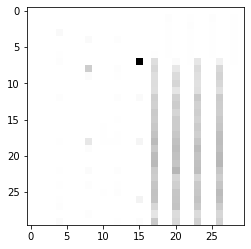

In [44]:
plt.imshow(test_pixels[200], cmap=plt.cm.binary)

In [45]:
def get_actual(symbol, limit=10):
    _dates=[]
    _action=[]
    _change = 0
    _records=dao.get_records(symbol, limit=limit+1)[::-1]
    for i, record in enumerate(_records):
        _dates.append(record["date"])
        if i + 1< len(_records):
            _change += 1 if record["data3"] < _records[i +1]["data3"] else -1
            _action.append(_change)

    if _dates:
        _dates.pop()

    return _dates, _action

In [46]:
import traceback
def get_prediction(symbol, limit=10):
    _dates=[]
    _action=[]
    _change = 0
    try:
        for _r in reversed(dao.get_records(symbol, limit=limit+1)):
            _date = _r["date"]
            _dates.append(_date)

            _record=dao.get_records(symbol, limit=dm.PIXEL_HEIGHT, date=_date)
            _symbol_data = np.zeros(shape=(1, dm.PIXEL_HEIGHT, dm.PIXEL_WIDTH))
            
            _symbol_data = np.append(
                _symbol_data, [dm.process_pixel(dm.get_as_pixel(_record))], axis=0,
            )

            _symbol_data = np.delete(_symbol_data, 0, axis=0)

            _tmp = np.argmax(model.predict(_symbol_data.clip(min=0)))
            _change += 1 if _tmp == 1 else -1
            _action.append(_change)

    except Exception as e:
        print(e)
        traceback.print_exc()

    if _dates and _action:
        _dates.pop()
        _action.pop()
    
    return _dates, _action

In [47]:
def plot(x, y, z, symbol):
    import matplotlib
    from matplotlib import pyplot
    from matplotlib import dates
    import datetime

    converted_dates = list(map(datetime.datetime.strptime, x, len(x)*['%Y-%m-%d']))
    x_axis = converted_dates
    formatter = dates.DateFormatter('%Y-%m-%d')

    y_axis = y
    z_axis = z

    pyplot.figure(figsize=(10, 6))
    title_obj = pyplot.title(symbol)
    pyplot.setp(title_obj, color='white')
    
    pyplot.plot( x_axis, y_axis, label="Actual" )

    pyplot.plot( x_axis, z_axis, label="Prediction" )

    ax = pyplot.gcf().axes[0] 
    ax.xaxis.set_major_formatter(formatter)
    pyplot.gcf().autofmt_xdate(rotation=25)

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    pyplot.legend()
    pyplot.show()

In [48]:
def normalize(y, z):
    min_y = abs(min(y))
    min_z = abs(min(z))

    offset = min_y if min_y > min_z else min_z

    y = [_y + offset for _y in y]
    z = [_z + offset for _z in z]

    return y, z

In [49]:
def compare(symbol, limit=10):
    x, y = get_actual(symbol, limit)
    _, z = get_prediction(symbol, limit)

    if y and z:
        y, z = normalize(y, z)
        plot(x, y, z, symbol)

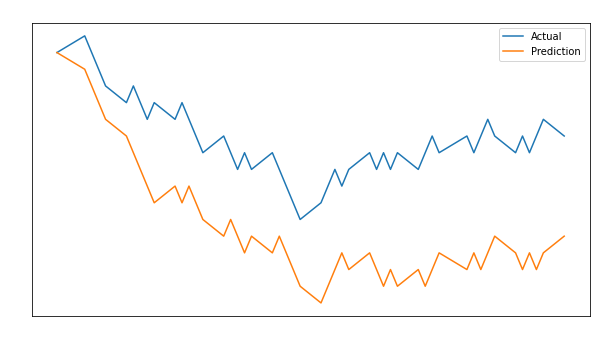

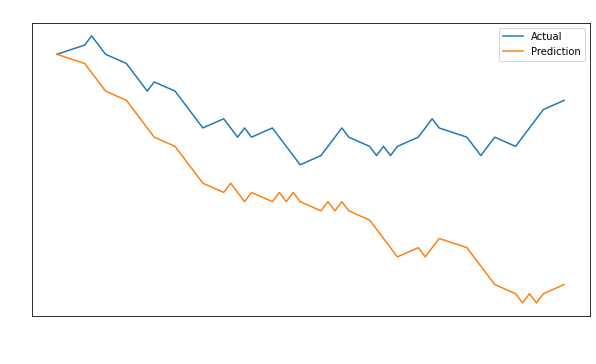

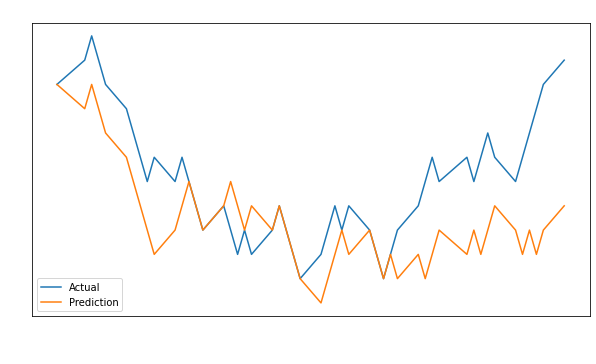

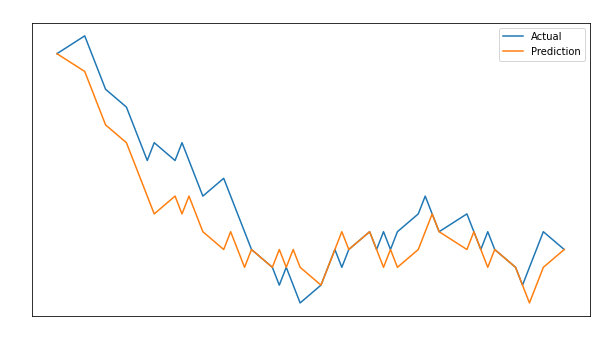

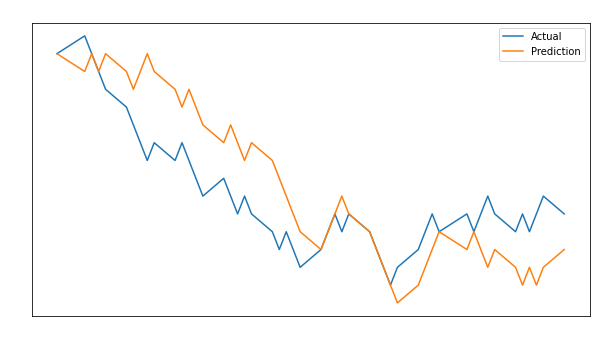

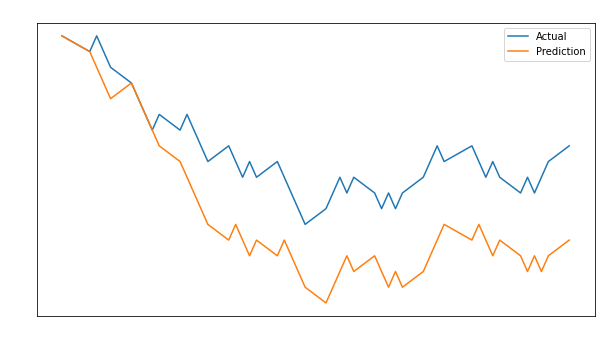

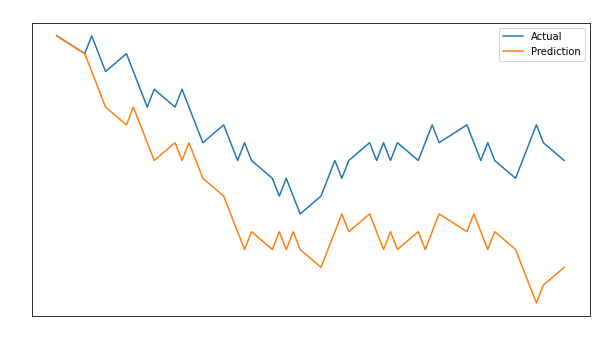

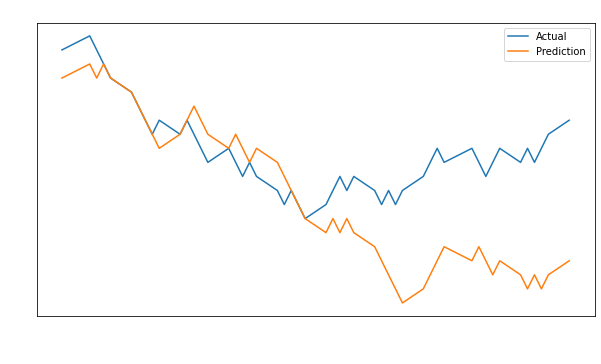

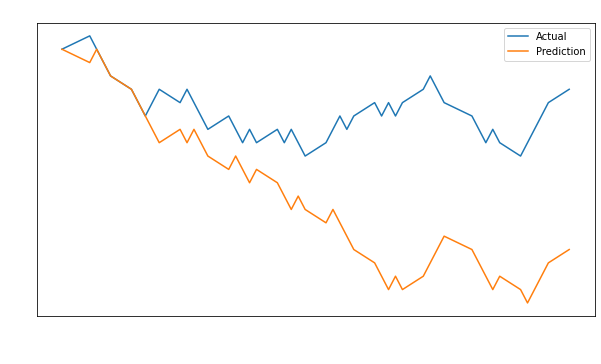

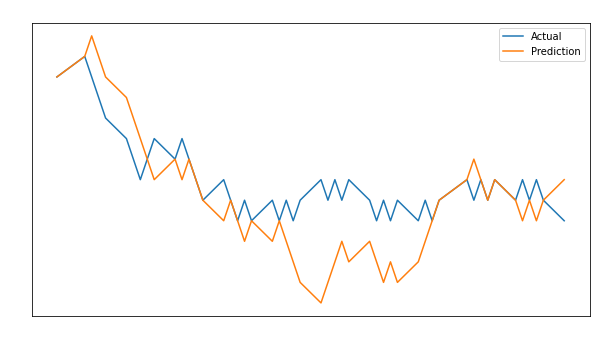

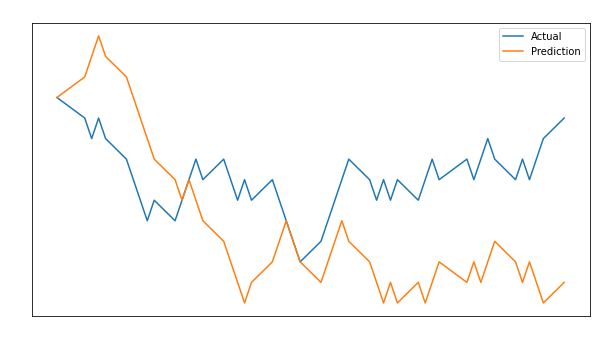

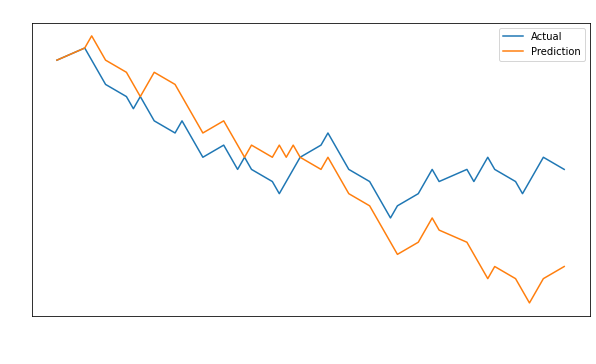

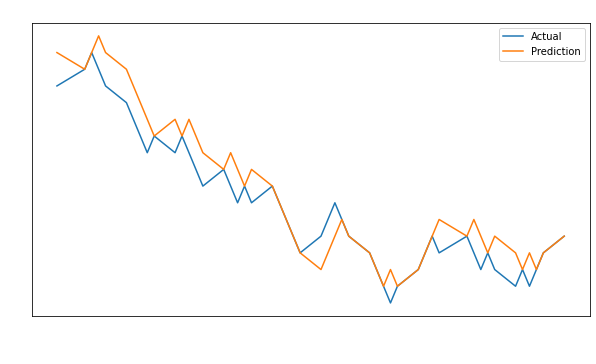

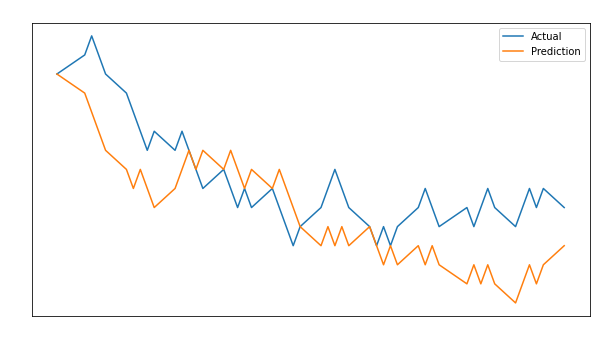

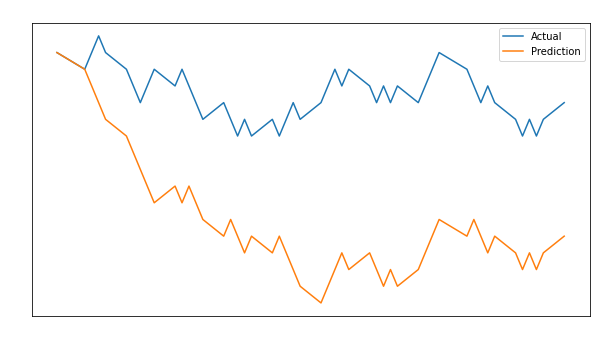

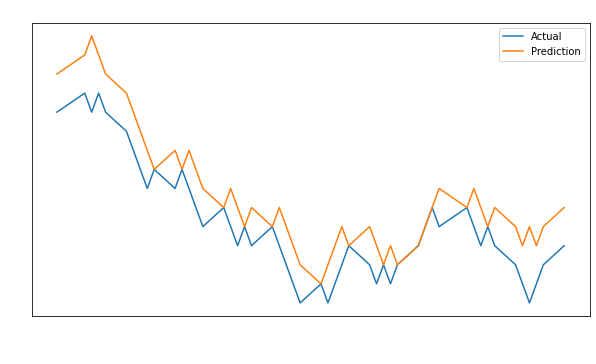

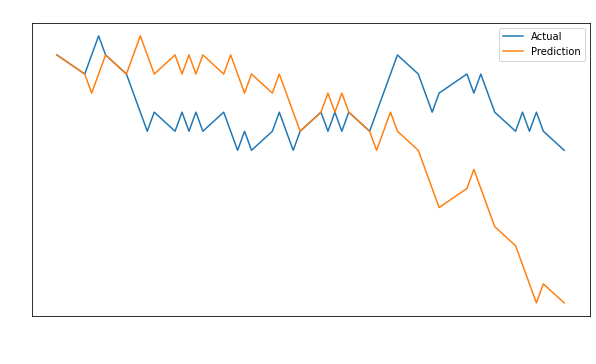

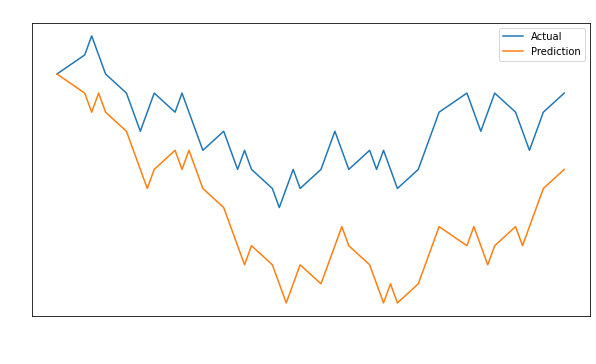

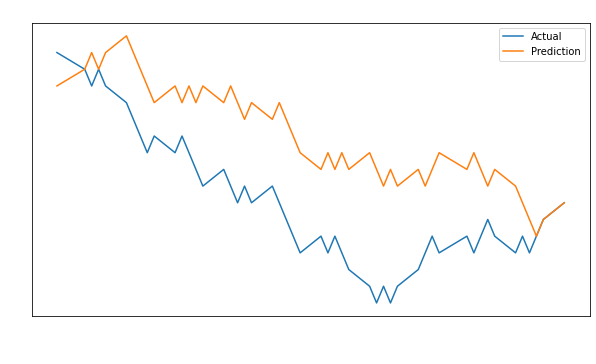

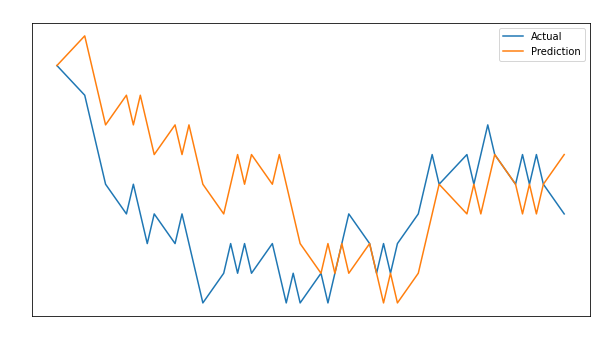

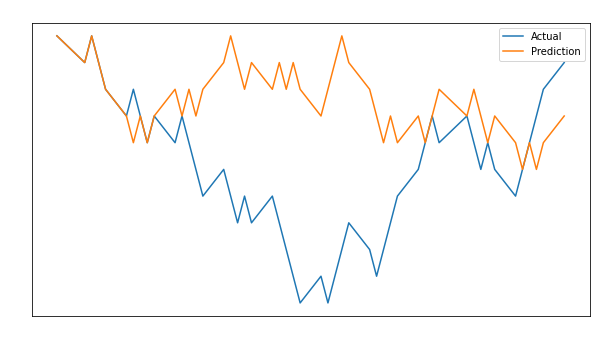

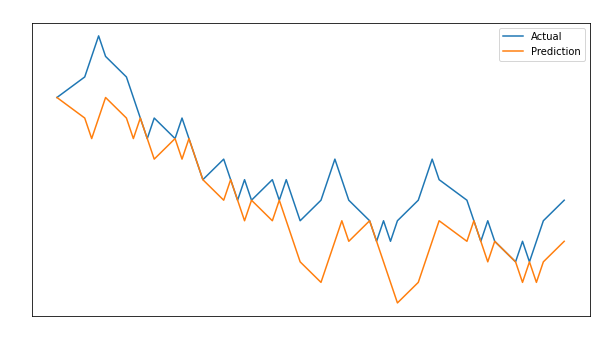

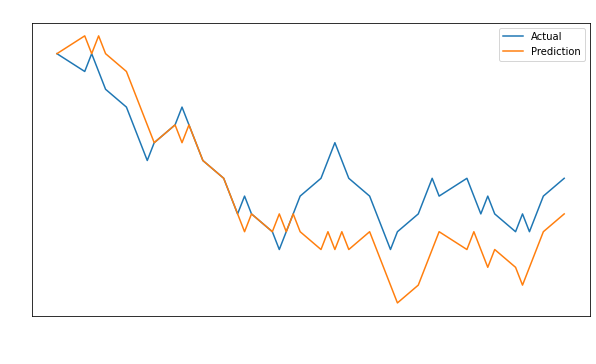

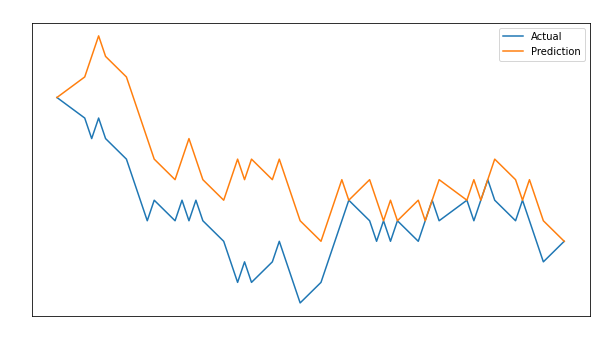

In [ ]:
for symbol in dao.get_symbols_list()[::-1][:25]:
    compare(symbol, 50)